In [168]:
# Base -----------------------------------
import pathlib
import sys
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from datetime import *
#para mostrar todas las columnas de la tabla
pd.set_option('display.max_columns', None)

In [169]:
# Viz ------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
plt.style.use('seaborn')

In [170]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [171]:
dffile = '/content/drive/Shareddrives/Capstone - Repsol (Group 3)/Repsol Model/FINAL DATASET/FinalMerged_diesel.csv'

df = pd.read_csv(dffile)

In [172]:
df

,Unnamed: 0.1,Unnamed: 0,year_month,region,total_consumption,diesel_consumption,diesel_price,diesel_withouttaxes,lastbrentprice,apparent_temperature_max,days_holidays,gasoline_fleet,diesel_fleet,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,touristic_region,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,0,0,2014-01-01,Valencian Region,227804.72,191961.46,NaN,NaN,"106,40",13.14,NaN,122184.0,146990.0,28.04,0.1,8.006332e+06,4.963466e+06,1613.052836,0,0,0.7,-0.6,0.0,81.650,1,0,44,3673.0,6529.0
1,1,1,2014-01-01,Madrid,277389.57,233589.13,NaN,NaN,"106,40",6.79,2.0,143123.0,206366.0,20.43,0.2,1.614141e+07,6.377936e+06,2530.819929,0,0,0.2,-0.5,-0.2,89.055,1,0,294,9720.0,17280.0
2,2,2,2014-01-01,La Rioja,24192.97,22164.65,NaN,NaN,"106,40",7.77,2.0,6146.0,10014.0,19.58,0.0,6.386617e+05,3.162320e+05,2019.598444,0,0,0.5,-0.6,-1.0,110.747,0,0,6,188.0,335.0
3,3,3,2014-01-01,Galicia,215829.82,199103.68,NaN,NaN,"106,40",9.92,2.0,55402.0,101688.0,23.20,0.4,4.502699e+06,2.747907e+06,1638.592295,0,0,0.4,0.5,-0.1,94.645,0,0,25,1347.0,2394.0
4,4,4,2014-01-01,Extremadura,64147.55,56911.49,NaN,NaN,"106,40",11.49,2.0,22400.0,40199.0,32.14,-0.1,1.414997e+06,1.097298e+06,1289.528897,0,0,0.6,-0.7,-0.4,76.387,0,0,16,417.0,741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2069,2069,2024-02-01,La Rioja,20264.90,17832.76,121.817,73.0902,"81,91",11.00,NaN,NaN,NaN,11.04,2.5,6.621811e+05,3.222820e+05,2054.663579,0,0,-1.7,1.2,1.0,99.284,0,0,NaN,NaN,NaN
2070,2070,2070,2024-02-01,Madrid,234267.35,171506.54,121.817,73.0902,"81,91",10.73,NaN,NaN,NaN,9.19,2.6,1.823846e+07,6.871903e+06,2654.062689,0,0,-1.1,1.6,1.0,113.633,1,0,NaN,NaN,NaN
2071,2071,2071,2024-02-01,Murcia,88885.71,76929.22,121.817,73.0902,"81,91",17.86,NaN,NaN,NaN,12.95,2.8,2.495522e+06,1.551692e+06,1608.258622,0,0,-1.4,1.8,0.4,95.408,0,0,NaN,NaN,NaN
2072,2072,2072,2024-02-01,Navarre,66271.05,59925.34,121.817,73.0902,"81,91",9.92,NaN,NaN,NaN,NaN,NaN,1.574635e+06,6.721550e+05,2342.667238,0,0,-1.3,1.4,0.7,108.314,0,0,NaN,NaN,NaN


In [173]:
# Drop the first two columns
df = df.iloc[:, 2:]

df

,year_month,region,total_consumption,diesel_consumption,diesel_price,diesel_withouttaxes,lastbrentprice,apparent_temperature_max,days_holidays,gasoline_fleet,diesel_fleet,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,touristic_region,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,2014-01-01,Valencian Region,227804.72,191961.46,NaN,NaN,"106,40",13.14,NaN,122184.0,146990.0,28.04,0.1,8.006332e+06,4.963466e+06,1613.052836,0,0,0.7,-0.6,0.0,81.650,1,0,44,3673.0,6529.0
1,2014-01-01,Madrid,277389.57,233589.13,NaN,NaN,"106,40",6.79,2.0,143123.0,206366.0,20.43,0.2,1.614141e+07,6.377936e+06,2530.819929,0,0,0.2,-0.5,-0.2,89.055,1,0,294,9720.0,17280.0
2,2014-01-01,La Rioja,24192.97,22164.65,NaN,NaN,"106,40",7.77,2.0,6146.0,10014.0,19.58,0.0,6.386617e+05,3.162320e+05,2019.598444,0,0,0.5,-0.6,-1.0,110.747,0,0,6,188.0,335.0
3,2014-01-01,Galicia,215829.82,199103.68,NaN,NaN,"106,40",9.92,2.0,55402.0,101688.0,23.20,0.4,4.502699e+06,2.747907e+06,1638.592295,0,0,0.4,0.5,-0.1,94.645,0,0,25,1347.0,2394.0
4,2014-01-01,Extremadura,64147.55,56911.49,NaN,NaN,"106,40",11.49,2.0,22400.0,40199.0,32.14,-0.1,1.414997e+06,1.097298e+06,1289.528897,0,0,0.6,-0.7,-0.4,76.387,0,0,16,417.0,741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2024-02-01,La Rioja,20264.90,17832.76,121.817,73.0902,"81,91",11.00,NaN,NaN,NaN,11.04,2.5,6.621811e+05,3.222820e+05,2054.663579,0,0,-1.7,1.2,1.0,99.284,0,0,NaN,NaN,NaN
2070,2024-02-01,Madrid,234267.35,171506.54,121.817,73.0902,"81,91",10.73,NaN,NaN,NaN,9.19,2.6,1.823846e+07,6.871903e+06,2654.062689,0,0,-1.1,1.6,1.0,113.633,1,0,NaN,NaN,NaN
2071,2024-02-01,Murcia,88885.71,76929.22,121.817,73.0902,"81,91",17.86,NaN,NaN,NaN,12.95,2.8,2.495522e+06,1.551692e+06,1608.258622,0,0,-1.4,1.8,0.4,95.408,0,0,NaN,NaN,NaN
2072,2024-02-01,Navarre,66271.05,59925.34,121.817,73.0902,"81,91",9.92,NaN,NaN,NaN,NaN,NaN,1.574635e+06,6.721550e+05,2342.667238,0,0,-1.3,1.4,0.7,108.314,0,0,NaN,NaN,NaN


In [174]:
dffileX = '/content/drive/Shareddrives/Capstone - Repsol (Group 3)/Repsol Model/FINAL DATASET/SURFACEAREA.CSV'

dfX = pd.read_csv(dffileX)

dfX = dfX.dropna(subset=['year_month'])

# Replace non-numeric values with NaN
dfX['surface_surface_area_to_build'] = pd.to_numeric(dfX['surface_surface_area_to_build'], errors='coerce')

# Convert the 'surface_surface_area_to_build' column to float64
dfX['surface_surface_area_to_build'] = dfX['surface_surface_area_to_build'].astype('float64')

# Convert 'year_month' to datetime
dfX['year_month'] = pd.to_datetime(dfX['year_month'], format='%m/%d/%y')

# Exclude rows with dates in the year 2023
dfX = dfX[dfX['year_month'].dt.year != 2023]

dfX


,year_month,region,surface_surface_area_to_build
0,2014-01-01,Valencian Region,44.0
1,2014-01-01,Madrid,294.0
2,2014-01-01,La Rioja,6.0
3,2014-01-01,Galicia,25.0
4,2014-01-01,Extremadura,16.0
...,...,...,...
1831,2022-12-01,La Rioja,2.0
1832,2022-12-01,Madrid,475.0
1833,2022-12-01,Murcia,18.0
1834,2022-12-01,Catalonia,238.0


In [175]:
import pandas as pd

# Assuming df is your initial dataframe
# Assuming dfX_cleaned is your cleaned dataframe with float64 values

# Ensure that the 'year_month' column in both dataframes is in datetime format for correct merging
df['year_month'] = pd.to_datetime(df['year_month'], errors='coerce')
dfX['year_month'] = pd.to_datetime(dfX['year_month'], errors='coerce')

# Merge df with dfX_cleaned on 'year_month' and 'region' to bring in the new values
df = df.merge(dfX[['year_month', 'region', 'surface_surface_area_to_build']],
                     on=['year_month', 'region'],
                     how='left',
                     suffixes=('', '_new'))

# Replace the old values with the new values where available
df['surface_surface_area_to_build'] = df['surface_surface_area_to_build_new'].combine_first(df['surface_surface_area_to_build'])

# Drop the temporary column used for merging
df.drop(columns=['surface_surface_area_to_build_new'], inplace=True)

# Display the updated dataframe
df


,year_month,region,total_consumption,diesel_consumption,diesel_price,diesel_withouttaxes,lastbrentprice,apparent_temperature_max,days_holidays,gasoline_fleet,diesel_fleet,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,touristic_region,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,2014-01-01,Valencian Region,227804.72,191961.46,NaN,NaN,"106,40",13.14,NaN,122184.0,146990.0,28.04,0.1,8.006332e+06,4.963466e+06,1613.052836,0,0,0.7,-0.6,0.0,81.650,1,0,44.0,3673.0,6529.0
1,2014-01-01,Madrid,277389.57,233589.13,NaN,NaN,"106,40",6.79,2.0,143123.0,206366.0,20.43,0.2,1.614141e+07,6.377936e+06,2530.819929,0,0,0.2,-0.5,-0.2,89.055,1,0,294.0,9720.0,17280.0
2,2014-01-01,La Rioja,24192.97,22164.65,NaN,NaN,"106,40",7.77,2.0,6146.0,10014.0,19.58,0.0,6.386617e+05,3.162320e+05,2019.598444,0,0,0.5,-0.6,-1.0,110.747,0,0,6.0,188.0,335.0
3,2014-01-01,Galicia,215829.82,199103.68,NaN,NaN,"106,40",9.92,2.0,55402.0,101688.0,23.20,0.4,4.502699e+06,2.747907e+06,1638.592295,0,0,0.4,0.5,-0.1,94.645,0,0,25.0,1347.0,2394.0
4,2014-01-01,Extremadura,64147.55,56911.49,NaN,NaN,"106,40",11.49,2.0,22400.0,40199.0,32.14,-0.1,1.414997e+06,1.097298e+06,1289.528897,0,0,0.6,-0.7,-0.4,76.387,0,0,16.0,417.0,741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2024-02-01,La Rioja,20264.90,17832.76,121.817,73.0902,"81,91",11.00,NaN,NaN,NaN,11.04,2.5,6.621811e+05,3.222820e+05,2054.663579,0,0,-1.7,1.2,1.0,99.284,0,0,NaN,NaN,NaN
2070,2024-02-01,Madrid,234267.35,171506.54,121.817,73.0902,"81,91",10.73,NaN,NaN,NaN,9.19,2.6,1.823846e+07,6.871903e+06,2654.062689,0,0,-1.1,1.6,1.0,113.633,1,0,NaN,NaN,NaN
2071,2024-02-01,Murcia,88885.71,76929.22,121.817,73.0902,"81,91",17.86,NaN,NaN,NaN,12.95,2.8,2.495522e+06,1.551692e+06,1608.258622,0,0,-1.4,1.8,0.4,95.408,0,0,NaN,NaN,NaN
2072,2024-02-01,Navarre,66271.05,59925.34,121.817,73.0902,"81,91",9.92,NaN,NaN,NaN,NaN,NaN,1.574635e+06,6.721550e+05,2342.667238,0,0,-1.3,1.4,0.7,108.314,0,0,NaN,NaN,NaN


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   year_month                                2074 non-null   datetime64[ns]
 1   region                                    2074 non-null   object        
 2   total_consumption                         2074 non-null   float64       
 3   diesel_consumption                        2074 non-null   float64       
 4   diesel_price                              1462 non-null   float64       
 5   diesel_withouttaxes                       1462 non-null   float64       
 6   lastbrentprice                            2074 non-null   object        
 7   apparent_temperature_max                  2074 non-null   float64       
 8   days_holidays                             1161 non-null   float64       
 9   gasoline_fleet                

In [177]:
# Convert year_month to datetime to filter data from 2014 to 2023
df['year_month'] = pd.to_datetime(df['year_month'])

# Filter the dataset to include only entries from 2014 to 2023
df_filtered = df[(df['year_month'].dt.year >= 2014) & (df['year_month'].dt.year <= 2023)]

# Get a list of columns that will be used for null value calculation (excluding unnecessary columns)
columns_to_check = df_filtered.columns.difference(['Unnamed: 0.1', 'Unnamed: 0', 'year_month', 'region'])

# Create a pivot table with regions as columns and variables as rows showing % of null values
null_percentage_table = df_filtered.pivot_table(
    index='region',
    values=columns_to_check,
    aggfunc=lambda x: x.isnull().mean() * 100
).T

# Display the null percentage table
null_percentage_table


region,Andalusia,Aragon,Asturias,Balearic Islands,Basque Country,Canary Islands,Cantabria,Castile and León,Castile-La Mancha,Catalonia,Extremadura,Galicia,La Rioja,Madrid,Murcia,Navarre,Valencian Region
IPC,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,100.0,100.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,0.0
UnemRate,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,100.0,100.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,0.0
apparent_temperature_max,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
covid_period,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
days_holidays,33.333333,40.0,33.333333,40.0,35.0,43.333333,30.833333,100.0,37.5,30.0,31.666667,30.833333,37.500000,38.333333,33.333333,37.5,100.0
diesel_consumption,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
diesel_fleet,70.000000,70.0,70.000000,70.0,70.0,70.000000,70.000000,100.0,70.0,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.0
diesel_price,30.000000,30.0,30.000000,30.0,30.0,30.000000,30.000000,30.0,30.0,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0
diesel_withouttaxes,30.000000,30.0,30.000000,30.0,30.0,30.000000,30.000000,30.0,30.0,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0
gasoline_fleet,70.000000,70.0,70.000000,70.0,70.0,70.000000,70.000000,100.0,70.0,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.0


In [178]:
import pandas as pd
import numpy as np

# Function to apply the desired formatting
def highlight_cells(val):
    if val > 50:
        color = 'red'
        font_weight = 'bold'
    elif 20 < val <= 50:
        color = 'orange'
        font_weight = 'normal'
    elif 1 < val <= 20:
        color = 'lightblue'
        font_weight = 'normal'
    else:
        color = ''
        font_weight = 'normal'
    return f'background-color: {color}; font-weight: {font_weight}'

# Apply the highlighting function to the DataFrame
styled_null_percentage_table = null_percentage_table.style.applymap(highlight_cells)

# Display the styled table
styled_null_percentage_table


region,Andalusia,Aragon,Asturias,Balearic Islands,Basque Country,Canary Islands,Cantabria,Castile and León,Castile-La Mancha,Catalonia,Extremadura,Galicia,La Rioja,Madrid,Murcia,Navarre,Valencian Region
IPC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
UnemRate,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
apparent_temperature_max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
covid_period,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
days_holidays,33.333333,40.000000,33.333333,40.000000,35.000000,43.333333,30.833333,100.000000,37.500000,30.000000,31.666667,30.833333,37.500000,38.333333,33.333333,37.500000,100.000000
diesel_consumption,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
diesel_fleet,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,100.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
diesel_price,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
diesel_withouttaxes,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
gasoline_fleet,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,100.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000


In [179]:
# Drop the specified columns
df = df.drop(columns=['diesel_fleet', 'gasoline_fleet'])

In [180]:
df

,year_month,region,total_consumption,diesel_consumption,diesel_price,diesel_withouttaxes,lastbrentprice,apparent_temperature_max,days_holidays,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,touristic_region,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,2014-01-01,Valencian Region,227804.72,191961.46,NaN,NaN,"106,40",13.14,NaN,28.04,0.1,8.006332e+06,4.963466e+06,1613.052836,0,0,0.7,-0.6,0.0,81.650,1,0,44.0,3673.0,6529.0
1,2014-01-01,Madrid,277389.57,233589.13,NaN,NaN,"106,40",6.79,2.0,20.43,0.2,1.614141e+07,6.377936e+06,2530.819929,0,0,0.2,-0.5,-0.2,89.055,1,0,294.0,9720.0,17280.0
2,2014-01-01,La Rioja,24192.97,22164.65,NaN,NaN,"106,40",7.77,2.0,19.58,0.0,6.386617e+05,3.162320e+05,2019.598444,0,0,0.5,-0.6,-1.0,110.747,0,0,6.0,188.0,335.0
3,2014-01-01,Galicia,215829.82,199103.68,NaN,NaN,"106,40",9.92,2.0,23.20,0.4,4.502699e+06,2.747907e+06,1638.592295,0,0,0.4,0.5,-0.1,94.645,0,0,25.0,1347.0,2394.0
4,2014-01-01,Extremadura,64147.55,56911.49,NaN,NaN,"106,40",11.49,2.0,32.14,-0.1,1.414997e+06,1.097298e+06,1289.528897,0,0,0.6,-0.7,-0.4,76.387,0,0,16.0,417.0,741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2024-02-01,La Rioja,20264.90,17832.76,121.817,73.0902,"81,91",11.00,NaN,11.04,2.5,6.621811e+05,3.222820e+05,2054.663579,0,0,-1.7,1.2,1.0,99.284,0,0,NaN,NaN,NaN
2070,2024-02-01,Madrid,234267.35,171506.54,121.817,73.0902,"81,91",10.73,NaN,9.19,2.6,1.823846e+07,6.871903e+06,2654.062689,0,0,-1.1,1.6,1.0,113.633,1,0,NaN,NaN,NaN
2071,2024-02-01,Murcia,88885.71,76929.22,121.817,73.0902,"81,91",17.86,NaN,12.95,2.8,2.495522e+06,1.551692e+06,1608.258622,0,0,-1.4,1.8,0.4,95.408,0,0,NaN,NaN,NaN
2072,2024-02-01,Navarre,66271.05,59925.34,121.817,73.0902,"81,91",9.92,NaN,NaN,NaN,1.574635e+06,6.721550e+05,2342.667238,0,0,-1.3,1.4,0.7,108.314,0,0,NaN,NaN,NaN


In [181]:
# Convert 'year_month' to datetime
df['year_month'] = pd.to_datetime(df['year_month'])

# Ensure 'surface_surface_area_to_build' is converted to float, handling non-numeric values
df['surface_surface_area_to_build'] = df['surface_surface_area_to_build'].replace({',': '.', '--': '0'}, regex=True).astype(float)

In [182]:
df

,year_month,region,total_consumption,diesel_consumption,diesel_price,diesel_withouttaxes,lastbrentprice,apparent_temperature_max,days_holidays,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,touristic_region,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,2014-01-01,Valencian Region,227804.72,191961.46,NaN,NaN,"106,40",13.14,NaN,28.04,0.1,8.006332e+06,4.963466e+06,1613.052836,0,0,0.7,-0.6,0.0,81.650,1,0,44.0,3673.0,6529.0
1,2014-01-01,Madrid,277389.57,233589.13,NaN,NaN,"106,40",6.79,2.0,20.43,0.2,1.614141e+07,6.377936e+06,2530.819929,0,0,0.2,-0.5,-0.2,89.055,1,0,294.0,9720.0,17280.0
2,2014-01-01,La Rioja,24192.97,22164.65,NaN,NaN,"106,40",7.77,2.0,19.58,0.0,6.386617e+05,3.162320e+05,2019.598444,0,0,0.5,-0.6,-1.0,110.747,0,0,6.0,188.0,335.0
3,2014-01-01,Galicia,215829.82,199103.68,NaN,NaN,"106,40",9.92,2.0,23.20,0.4,4.502699e+06,2.747907e+06,1638.592295,0,0,0.4,0.5,-0.1,94.645,0,0,25.0,1347.0,2394.0
4,2014-01-01,Extremadura,64147.55,56911.49,NaN,NaN,"106,40",11.49,2.0,32.14,-0.1,1.414997e+06,1.097298e+06,1289.528897,0,0,0.6,-0.7,-0.4,76.387,0,0,16.0,417.0,741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2024-02-01,La Rioja,20264.90,17832.76,121.817,73.0902,"81,91",11.00,NaN,11.04,2.5,6.621811e+05,3.222820e+05,2054.663579,0,0,-1.7,1.2,1.0,99.284,0,0,NaN,NaN,NaN
2070,2024-02-01,Madrid,234267.35,171506.54,121.817,73.0902,"81,91",10.73,NaN,9.19,2.6,1.823846e+07,6.871903e+06,2654.062689,0,0,-1.1,1.6,1.0,113.633,1,0,NaN,NaN,NaN
2071,2024-02-01,Murcia,88885.71,76929.22,121.817,73.0902,"81,91",17.86,NaN,12.95,2.8,2.495522e+06,1.551692e+06,1608.258622,0,0,-1.4,1.8,0.4,95.408,0,0,NaN,NaN,NaN
2072,2024-02-01,Navarre,66271.05,59925.34,121.817,73.0902,"81,91",9.92,NaN,NaN,NaN,1.574635e+06,6.721550e+05,2342.667238,0,0,-1.3,1.4,0.7,108.314,0,0,NaN,NaN,NaN


# **Andalusia**

In [183]:
import pandas as pd

# Assuming df is your original DataFrame
df_Andalusia = df[df['region'] == 'Andalusia']

# Display the first few rows to confirm
print(df_Andalusia.head())


   year_month     region  total_consumption  diesel_consumption  diesel_price  \
13 2014-01-01  Andalusia          377814.73           324160.87           NaN   
17 2014-02-01  Andalusia          347637.16           298274.45           NaN   
34 2014-03-01  Andalusia          404570.46           347401.10           NaN   
51 2014-04-01  Andalusia          386716.46           328745.20           NaN   
70 2014-05-01  Andalusia          406517.14           347275.01           NaN   

    diesel_withouttaxes lastbrentprice  apparent_temperature_max  \
13                  NaN         106,40                     13.67   
17                  NaN         109,07                     13.45   
34                  NaN         107,76                     18.27   
51                  NaN         108,07                     24.56   
70                  NaN         109,41                     28.14   

    days_holidays  UnemRate  IPC           gdp  population  gdp_xcapita  \
13            2.0     34.94  

In [184]:
df_Andalusia

,year_month,region,total_consumption,diesel_consumption,diesel_price,diesel_withouttaxes,lastbrentprice,apparent_temperature_max,days_holidays,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,touristic_region,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
13,2014-01-01,Andalusia,377814.73,324160.87,NaN,NaN,"106,40",13.67,2.0,34.94,0.1,1.144824e+07,8381267.0,1365.932260,0,0,0.5,-0.5,-0.5,105.607,1,0,104.0,3998.0,7107.0
17,2014-02-01,Andalusia,347637.16,298274.45,NaN,NaN,"109,07",13.45,1.0,34.94,-0.2,1.175540e+07,8381253.0,1402.582914,0,0,0.2,0.0,0.2,95.693,1,0,102.0,3998.0,7107.0
34,2014-03-01,Andalusia,404570.46,347401.10,NaN,NaN,"107,76",18.27,NaN,34.94,-0.1,1.079752e+07,8381239.0,1288.296817,0,0,0.5,0.0,0.3,105.974,1,0,224.0,3998.0,7107.0
51,2014-04-01,Andalusia,386716.46,328745.20,NaN,NaN,"108,07",24.56,2.0,34.74,0.3,1.141329e+07,8381274.0,1361.761038,0,0,0.0,0.4,0.9,94.041,1,1,80.0,3998.0,7107.0
70,2014-05-01,Andalusia,406517.14,347275.01,NaN,NaN,"109,41",28.14,1.0,34.74,0.1,1.147628e+07,8381309.0,1369.270114,0,0,0.0,0.1,0.0,104.709,1,1,133.0,3998.0,7107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,2023-10-01,Andalusia,422323.74,345679.55,129.183,77.5098,"85,02",26.56,1.0,17.61,3.8,1.520131e+07,8584147.0,1770.858608,0,1,-0.8,-0.9,0.5,104.806,1,1,NaN,9821.0,4230.0
2009,2023-11-01,Andalusia,427503.33,355493.87,123.639,74.1834,"80,86",19.86,1.0,17.61,3.5,1.524318e+07,8584147.0,1775.736256,0,1,-1.5,-1.5,-0.5,99.485,1,0,NaN,9821.0,4230.0
2031,2023-12-01,Andalusia,423986.51,348408.00,118.129,70.8774,"77,04",14.67,3.0,17.61,3.3,1.701876e+07,8584147.0,1982.580448,0,1,0.8,-1.2,0.2,87.902,1,0,NaN,9821.0,4230.0
2054,2024-01-01,Andalusia,412239.17,341254.37,117.262,70.3572,"80,55",16.74,NaN,17.77,3.8,1.161581e+07,8584147.0,1353.170298,0,1,3.7,0.2,-0.1,96.894,1,0,NaN,NaN,NaN


In [185]:
# Drop the specified columns
df_Andalusia = df_Andalusia.drop(columns=['total_consumption', 'diesel_withouttaxes', 'touristic_region', 'region'])


In [186]:
import pandas as pd
from IPython.display import display, HTML
import base64
from io import BytesIO

def download_excel(df):
    # Create a BytesIO buffer to save the Excel file
    output = BytesIO()
    # Using the default Excel writer
    df.to_excel(output, index=False)
    output.seek(0)

    # Encode the Excel file to base64
    data = base64.b64encode(output.read()).decode('utf-8')

    # Generate a download link
    html = '<a download="df_filled.xlsx" href="data:application/vnd.openxmlformats-officedocument.spreadsheetml.sheet;base64,{0}" target="_blank">Download Excel file</a>'.format(data)
    display(HTML(html))

# Assume df is your DataFrame
download_excel(df_Andalusia)

In [187]:
# Assuming df_global is your original DataFrame

# Create a sub-data frame 'df_surface' with only the 'year_month' and 'surface_surface_area_to_build' columns
df_surface = df_Andalusia[['year_month', 'surface_surface_area_to_build']]

# Display the sub-data frame
df_surface

,year_month,surface_surface_area_to_build
13,2014-01-01,104.0
17,2014-02-01,102.0
34,2014-03-01,224.0
51,2014-04-01,80.0
70,2014-05-01,133.0
...,...,...
1997,2023-10-01,NaN
2009,2023-11-01,NaN
2031,2023-12-01,NaN
2054,2024-01-01,NaN


                                     SARIMAX Results                                     
Dep. Variable:     surface_surface_area_to_build   No. Observations:                  110
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 6)   Log Likelihood                -621.159
Date:                           Wed, 10 Jul 2024   AIC                           1252.319
Time:                                   11:54:45   BIC                           1265.541
Sample:                                        0   HQIC                          1257.676
                                           - 110                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3512      0.119      2.945      0.003       0.117       0.585
ar.L2          0.1413      0.122      1.156

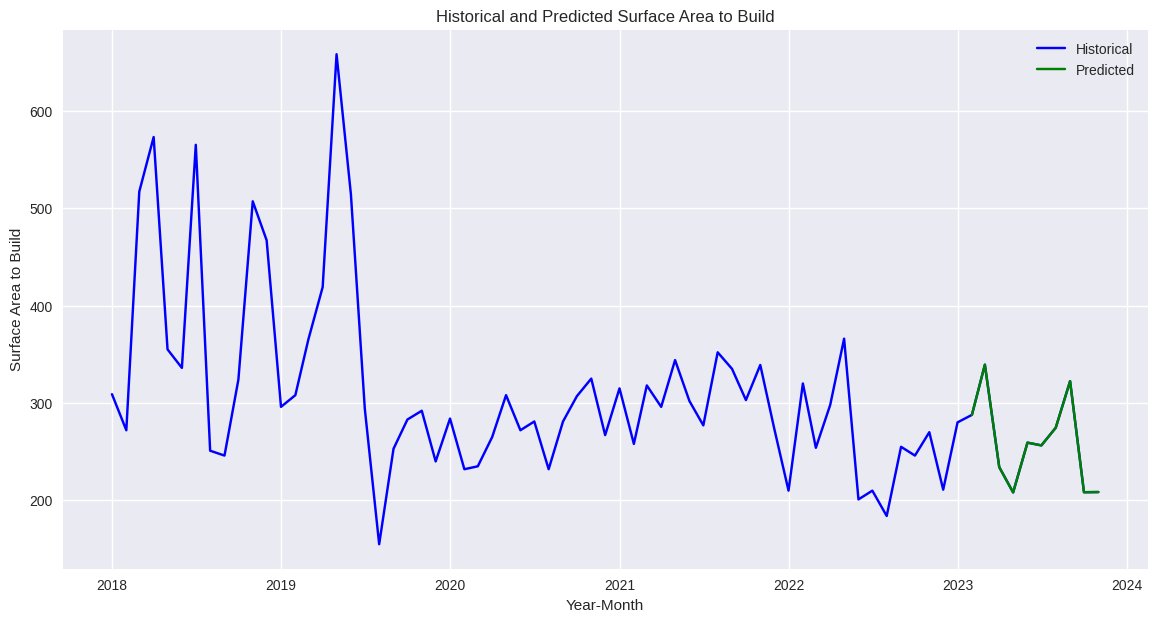

In [188]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Assuming df_surface is your DataFrame
# Convert 'year_month' to datetime
df_surface['year_month'] = pd.to_datetime(df_surface['year_month'])

# Exclude rows with dates in the year 2023
df_surface_filtered = df_surface[df_surface['year_month'].dt.year != 2023]

# Fit SARIMA model
order = (2, 0, 0)  # (p,d,q)
seasonal_order = (2, 1, 0, 6)  # (P,D,Q,s)
model = SARIMAX(df_surface_filtered['surface_surface_area_to_build'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Show statistical summary
print(results.summary())

# Forecasting for 2023
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start='2023-01-01', periods=forecast_steps, freq='MS')
forecast_df = forecast.predicted_mean
forecast_df.index = forecast_index

# Combine the historical data and forecast
df_forecast = pd.DataFrame({
    'year_month': forecast_df.index,
    'predictions': forecast_df.values
})

# Merge the forecast with the original DataFrame
df_combined = pd.merge(df_surface, df_forecast, on='year_month', how='outer')

# Fill NaN values in 'surface_surface_area_to_build' column with 0
df_combined['surface_surface_area_to_build'].fillna(0, inplace=True)

# Display the combined DataFrame
print(df_combined)

# Combine the historical data and forecast
df_forecast = pd.DataFrame({
    'year_month': forecast_df.index,
    'predictions': forecast_df.values
})

# Merge the forecast with the original DataFrame
df_combined = pd.merge(df_surface, df_forecast, on='year_month', how='outer')

# Fill NaN values in 'surface_surface_area_to_build' column with 0
df_combined['surface_surface_area_to_build'].fillna(0, inplace=True)

# Create the 'surface_area' column
df_combined['surface_area'] = df_combined.apply(
    lambda row: row['surface_surface_area_to_build'] if row['year_month'].year != 2023 else row['predictions'],
    axis=1
)

# Filter the dataframe to include data from 2018 to 2023-11-01
historical_data = df_combined[(df_combined['year_month'] >= '2018-01-01') & (df_combined['year_month'] <= '2023-11-01')]
predicted_data = df_combined[(df_combined['year_month'] > '2023-01-01') & (df_combined['year_month'] <= '2023-11-01')]

# Plot historical and predicted values
plt.figure(figsize=(14, 7))

# Plot historical data
plt.plot(historical_data['year_month'], historical_data['surface_area'], label='Historical', color='blue')

# Plot predicted data
plt.plot(predicted_data['year_month'], predicted_data['surface_area'], label='Predicted', color='green')

plt.xlabel('Year-Month')
plt.ylabel('Surface Area to Build')
plt.title('Historical and Predicted Surface Area to Build')
plt.legend()
plt.show()


In [189]:


# Drop the unnecessary columns
df_combined.drop(columns=['surface_surface_area_to_build', 'predictions'], inplace=True)

# Display the combined DataFrame
print(df_combined)


    year_month  surface_area
0   2014-01-01    104.000000
1   2014-02-01    102.000000
2   2014-03-01    224.000000
3   2014-04-01     80.000000
4   2014-05-01    133.000000
..         ...           ...
117 2023-10-01    208.383742
118 2023-11-01    208.558178
119 2023-12-01    240.654310
120 2024-01-01      0.000000
121 2024-02-01      0.000000

[122 rows x 2 columns]


In [190]:
# Merge df_global with df_combined on 'year_month'
df_Andalusia = pd.merge(df_Andalusia, df_combined[['year_month', 'surface_area']], on='year_month', how='left')

# Replace 'surface_surface_area_to_build' in df_global with 'surface_area' from df_combined
df_Andalusia['surface_surface_area_to_build'] = df_Andalusia['surface_area']

# Drop the 'surface_area' column as it is no longer needed
df_Andalusia.drop(columns=['surface_area'], inplace=True)

# Display the updated DataFrame
print(df_Andalusia)


    year_month  diesel_consumption  diesel_price lastbrentprice  \
0   2014-01-01           324160.87           NaN         106,40   
1   2014-02-01           298274.45           NaN         109,07   
2   2014-03-01           347401.10           NaN         107,76   
3   2014-04-01           328745.20           NaN         108,07   
4   2014-05-01           347275.01           NaN         109,41   
..         ...                 ...           ...            ...   
117 2023-10-01           345679.55       129.183          85,02   
118 2023-11-01           355493.87       123.639          80,86   
119 2023-12-01           348408.00       118.129          77,04   
120 2024-01-01           341254.37       117.262          80,55   
121 2024-02-01           307304.43       121.817          81,91   

     apparent_temperature_max  days_holidays  UnemRate  IPC           gdp  \
0                       13.67            2.0     34.94  0.1  1.144824e+07   
1                       13.45            

In [191]:
import pandas as pd
import numpy as np

# Assuming df_global is your DataFrame
# Convert 'year_month' to datetime if it isn't already
df_Andalusia['year_month'] = pd.to_datetime(df_Andalusia['year_month'])

# Filter for rows in the year 2024
mask_2024 = df_Andalusia['year_month'].dt.year == 2024

# Replace 0s with NaNs in the specified rows
df_Andalusia.loc[mask_2024] = df_Andalusia.loc[mask_2024].replace(0, np.nan)

# Display the updated DataFrame
df_Andalusia

,year_month,diesel_consumption,diesel_price,lastbrentprice,apparent_temperature_max,days_holidays,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,2014-01-01,324160.87,NaN,"106,40",13.67,2.0,34.94,0.1,1.144824e+07,8381267.0,1365.932260,0.0,0.0,0.5,-0.5,-0.5,105.607,0.0,104.000000,3998.0,7107.0
1,2014-02-01,298274.45,NaN,"109,07",13.45,1.0,34.94,-0.2,1.175540e+07,8381253.0,1402.582914,0.0,0.0,0.2,0.0,0.2,95.693,0.0,102.000000,3998.0,7107.0
2,2014-03-01,347401.10,NaN,"107,76",18.27,NaN,34.94,-0.1,1.079752e+07,8381239.0,1288.296817,0.0,0.0,0.5,0.0,0.3,105.974,0.0,224.000000,3998.0,7107.0
3,2014-04-01,328745.20,NaN,"108,07",24.56,2.0,34.74,0.3,1.141329e+07,8381274.0,1361.761038,0.0,0.0,0.0,0.4,0.9,94.041,1.0,80.000000,3998.0,7107.0
4,2014-05-01,347275.01,NaN,"109,41",28.14,1.0,34.74,0.1,1.147628e+07,8381309.0,1369.270114,0.0,0.0,0.0,0.1,0.0,104.709,1.0,133.000000,3998.0,7107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2023-10-01,345679.55,129.183,"85,02",26.56,1.0,17.61,3.8,1.520131e+07,8584147.0,1770.858608,0.0,1.0,-0.8,-0.9,0.5,104.806,1.0,208.383742,9821.0,4230.0
118,2023-11-01,355493.87,123.639,"80,86",19.86,1.0,17.61,3.5,1.524318e+07,8584147.0,1775.736256,0.0,1.0,-1.5,-1.5,-0.5,99.485,0.0,208.558178,9821.0,4230.0
119,2023-12-01,348408.00,118.129,"77,04",14.67,3.0,17.61,3.3,1.701876e+07,8584147.0,1982.580448,0.0,1.0,0.8,-1.2,0.2,87.902,0.0,240.654310,9821.0,4230.0
120,2024-01-01,341254.37,117.262,"80,55",16.74,NaN,17.77,3.8,1.161581e+07,8584147.0,1353.170298,NaN,1.0,3.7,0.2,-0.1,96.894,NaN,NaN,NaN,NaN


In [192]:
# Replace commas with dots in all columns to convert to numeric values
for col in df_Andalusia.columns:
    if df_Andalusia[col].dtype == object:
        df_Andalusia[col] = df_Andalusia[col].str.replace(',', '.').astype(float)

# Convert all other columns to float64 except 'year_month'
for col in df_Andalusia.columns:
    if col != 'year_month':
        df_Andalusia[col] = df_Andalusia[col].astype('float64')

# Drop the 'gasoline_price' column
df_Andalusia.drop(columns=['diesel_price'], inplace=True)

# Display the dataframe info to confirm changes
df_Andalusia.info()

# Calculate 12-month moving average for 'gasoline_consumption' and 'gdp_xcapita'
df_Andalusia['diesel_consumption_ma'] = df_Andalusia['diesel_consumption'].rolling(window=12).mean()
df_Andalusia['gdp_xcapita_ma'] = df_Andalusia['gdp_xcapita'].rolling(window=12).mean()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   year_month                                122 non-null    datetime64[ns]
 1   diesel_consumption                        122 non-null    float64       
 2   lastbrentprice                            122 non-null    float64       
 3   apparent_temperature_max                  122 non-null    float64       
 4   days_holidays                             80 non-null     float64       
 5   UnemRate                                  122 non-null    float64       
 6   IPC                                       122 non-null    float64       
 7   gdp                                       122 non-null    float64       
 8   population                                122 non-null    float64       
 9   gdp_xcapita                     

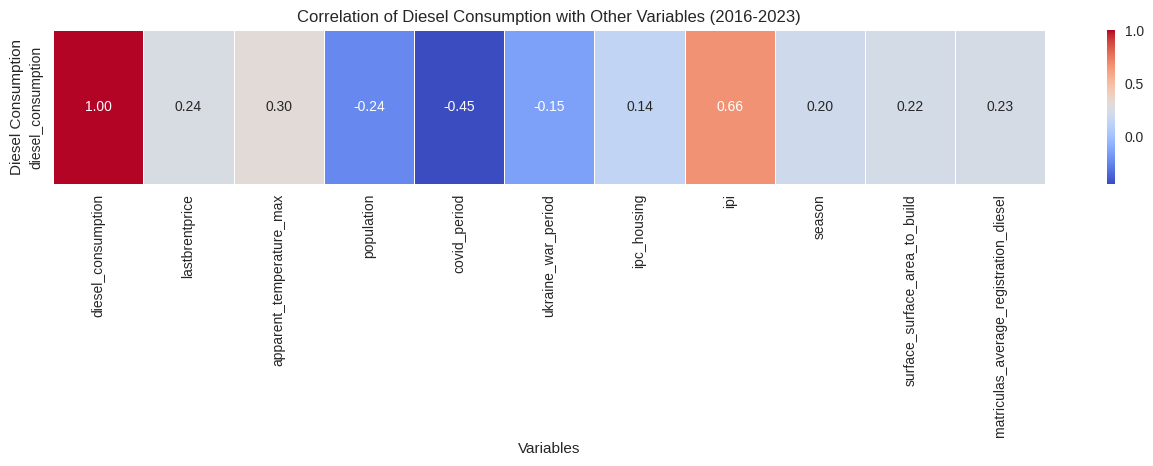

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for the specified period
df_filtered = df_Andalusia[(df_Andalusia['year_month'] >= '2016-01-01') & (df_Andalusia['year_month'] <= '2023-12-31')]

# Columns to exclude
columns_to_exclude = ['matriculas_average_registration_gasoline', 'diesel_consumption_ma', 'year_month']

# Drop the specified columns
df_filtered_excld = df_filtered.drop(columns=columns_to_exclude)

# Calculate the correlation matrix
correlation_matrix = df_filtered_excld.corr()

# Filter the correlation matrix to only show values greater than 0.1 or less than -0.1
filtered_corr_matrix = correlation_matrix.loc[['diesel_consumption']].T
filtered_corr_matrix = filtered_corr_matrix[(filtered_corr_matrix['diesel_consumption'] > 0.1) | (filtered_corr_matrix['diesel_consumption'] < -0.1)]

# Generate a heatmap
plt.figure(figsize=(16, 2))
sns.heatmap(filtered_corr_matrix.T, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Diesel Consumption with Other Variables (2016-2023)')
plt.xlabel('Variables')
plt.ylabel('Diesel Consumption')
plt.show()

# Model Development

In [194]:
df_Andalusia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   year_month                                122 non-null    datetime64[ns]
 1   diesel_consumption                        122 non-null    float64       
 2   lastbrentprice                            122 non-null    float64       
 3   apparent_temperature_max                  122 non-null    float64       
 4   days_holidays                             80 non-null     float64       
 5   UnemRate                                  122 non-null    float64       
 6   IPC                                       122 non-null    float64       
 7   gdp                                       122 non-null    float64       
 8   population                                122 non-null    float64       
 9   gdp_xcapita                     

In [195]:
# Fill missing values in covid_period column with 0
df_Andalusia['covid_period'].fillna(0, inplace=True)

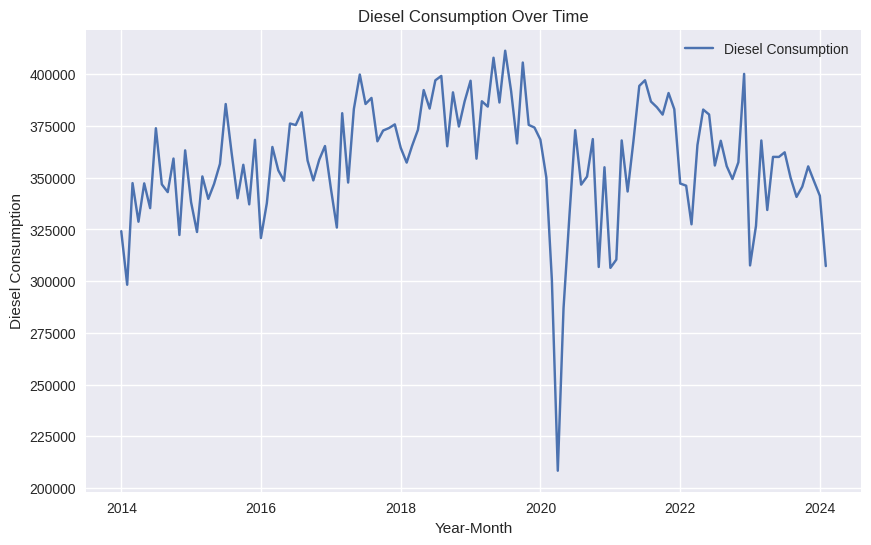

In [196]:
import matplotlib.pyplot as plt

# Plot the gasoline consumption
plt.figure(figsize=(10, 6))
plt.plot(df_Andalusia['year_month'], df_Andalusia['diesel_consumption'], label='Diesel Consumption')
plt.xlabel('Year-Month')
plt.ylabel('Diesel Consumption')
plt.title('Diesel Consumption Over Time')
plt.legend()
plt.show()

In [197]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(df_Andalusia['diesel_consumption'].dropna())

# Print the test results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('if p-value > 0.05 --> Data is not stationary')

ADF Statistic: -5.973074405287374
p-value: 1.9157113695606965e-07
if p-value > 0.05 --> Data is not stationary


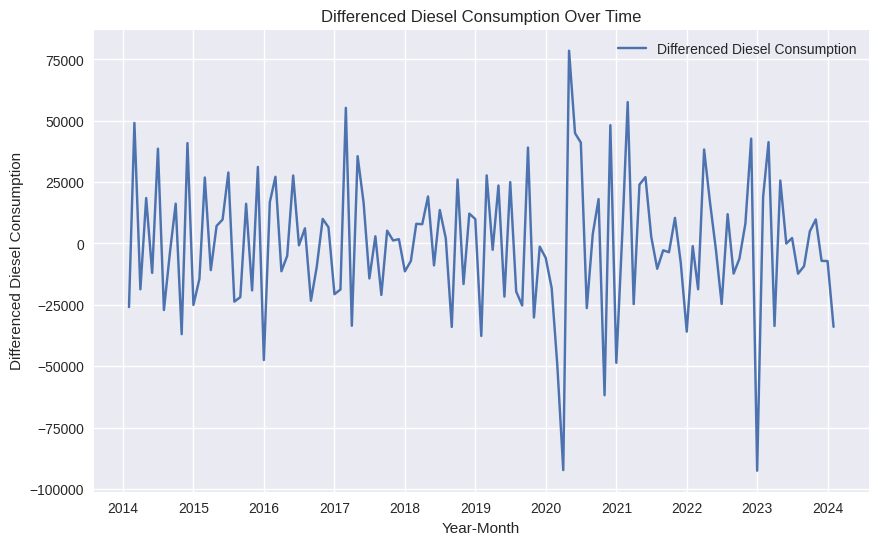

In [198]:
# Differencing the gasoline consumption
df_Andalusia['diesel_consumption_diff'] = df_Andalusia['diesel_consumption'].diff()

# Plot the differenced gasoline consumption
plt.figure(figsize=(10, 6))
plt.plot(df_Andalusia['year_month'], df_Andalusia['diesel_consumption_diff'], label='Differenced Diesel Consumption')
plt.xlabel('Year-Month')
plt.ylabel('Differenced Diesel Consumption')
plt.title('Differenced Diesel Consumption Over Time')
plt.legend()
plt.show()

In [199]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(df_Andalusia['diesel_consumption_diff'].dropna())

# Print the test results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

print('if p-value < 0.05 --> Data is stationary')

ADF Statistic: -7.042012141979799
p-value: 5.814007666679189e-10
if p-value < 0.05 --> Data is stationary


In [200]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
ljung_box_result = acorr_ljungbox(df_Andalusia['diesel_consumption'].dropna(), lags=[10])

# Print the test results
print('Ljung-Box Test Statistic:', ljung_box_result['lb_stat'].values)
print('p-values:', ljung_box_result['lb_pvalue'].values)
print('if p-value < 0.05 --> Data is correlated (and not WN)')

Ljung-Box Test Statistic: [69.07442284]
p-values: [6.68866936e-11]
if p-value < 0.05 --> Data is correlated (and not WN)


In [201]:
# Split the data
train = df_Andalusia[df_Andalusia['year_month'] < '2023-01-01']
test = df_Andalusia[df_Andalusia['year_month'] >= '2023-01-01']

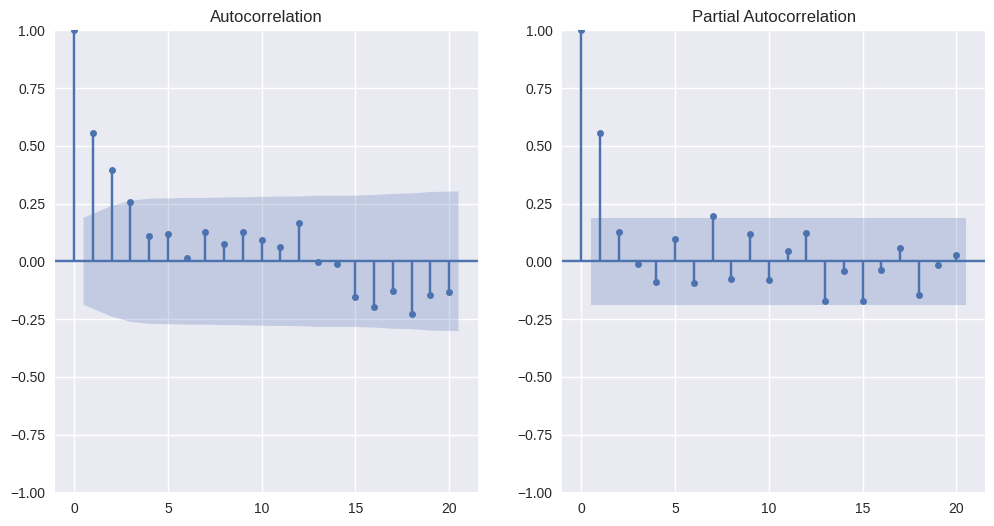

In [202]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(train['diesel_consumption'], lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(train['diesel_consumption'], lags=20, ax=plt.gca())
plt.show()

In [203]:
import statsmodels.api as sm

# Define the SARIMAX model with the new exogenous variable
model = sm.tsa.statespace.SARIMAX(train['diesel_consumption'],
                                  order=(1, 1, 0),
                                  seasonal_order=(1, 1, 0, 12),
                                  exog=train[['covid_period', 'ipi']])

# Fit the model
sarimax_model = model.fit()

# Print the statistical summary
print(sarimax_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                 diesel_consumption   No. Observations:                  108
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood               -1079.386
Date:                            Wed, 10 Jul 2024   AIC                           2168.771
Time:                                    11:54:50   BIC                           2181.541
Sample:                                         0   HQIC                          2173.931
                                            - 108                                         
Covariance Type:                              opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
covid_period  -3.99e+04   1.26e+04     -3.160      0.002   -6.46e+04   -1.52e+04
ipi           3070.7571    22

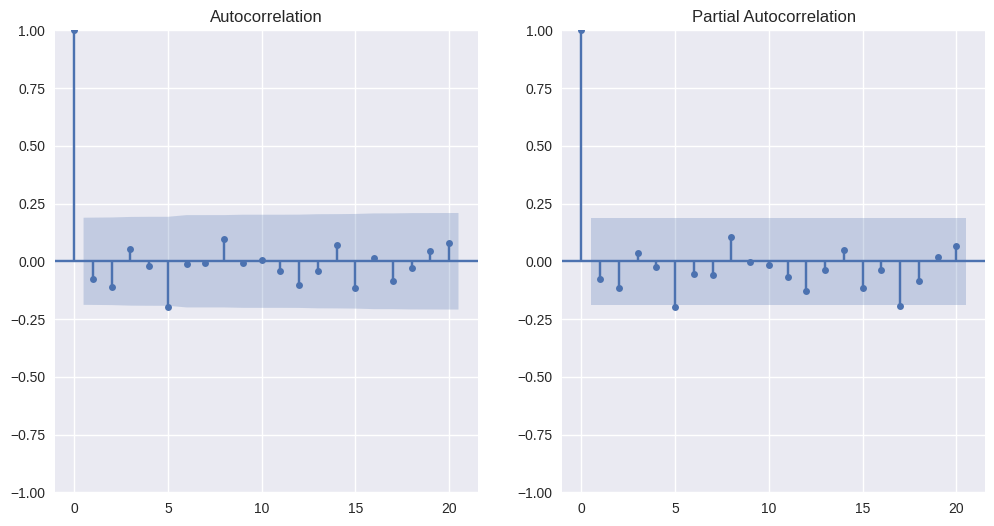

In [204]:
# Plot ACF and PACF of residuals
residuals = sarimax_model.resid

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.show()

In [205]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test on residuals
ljung_box_result_resid = acorr_ljungbox(residuals, lags=[10])

# Print the test results
print('Ljung-Box Test Statistic (Residuals):', ljung_box_result_resid['lb_stat'].values)
print('p-values (Residuals):', ljung_box_result_resid['lb_pvalue'].values)
print('if p-value > 0.05 --> Data is uncorrelated (and is WN)')

Ljung-Box Test Statistic (Residuals): [8.1715743]
p-values (Residuals): [0.61208206]
if p-value > 0.05 --> Data is uncorrelated (and is WN)


In [206]:
# Drop rows with dates beyond 2023
df_Andalusia = df_Andalusia[df_Andalusia['year_month'] < '2024-01-01']

In [207]:
# Ensure there are no infinite values
df_Andalusia['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)

# Verify if there are any remaining NaNs or infinite values
print(df_Andalusia[['covid_period']].isnull().sum())
print(np.isfinite(df_Andalusia[['covid_period']]).sum())

covid_period    0
dtype: int64
covid_period    120
dtype: int64


In [208]:
# Fill missing values with 0
train['covid_period'].fillna(0, inplace=True)
test['covid_period'].fillna(0, inplace=True)

# Replace infinite values with 0
train['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)
test['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)

# Verify that there are no more infinite or missing values
print('Missing values in train:', train[['covid_period']].isnull().sum())
print('Infinite values in train:', np.isfinite(train[['covid_period']]).sum())
print('Missing values in test:', test[['covid_period']].isnull().sum())
print('Infinite values in test:', np.isfinite(test[['covid_period']]).sum())

Missing values in train: covid_period    0
dtype: int64
Infinite values in train: covid_period    108
dtype: int64
Missing values in test: covid_period    0
dtype: int64
Infinite values in test: covid_period    14
dtype: int64


In [209]:
# Ensure the indices are properly aligned
test_exog = test[['covid_period', 'ipi']]

# Make predictions for the test set
predictions = sarimax_model.predict(start=len(train), end=len(train) + len(test) - 1, exog=test_exog, dynamic=False)

# Add in-sample predictions to the DataFrame
train_exog = train[['covid_period']]
in_sample_predictions = sarimax_model.predict(start=0, end=len(train) - 1, exog=train_exog, dynamic=False)

# Combine in-sample and out-of-sample predictions
full_predictions = pd.concat([in_sample_predictions, predictions])

# Ensure the length of predictions matches the length of df_global
df_Andalusia['predictions'] = full_predictions.reset_index(drop=True)

In [210]:
# Ensure that the length of the predictions for 2023 matches the number of rows in 2023
rows_2023 = df_Andalusia[df_Andalusia['year_month'] >= '2023-01-01'].index
if len(predictions) == len(rows_2023):
    df_Andalusia.loc[rows_2023, 'historical_and_predicted'] = predictions.values
else:
    print(f"Length mismatch: predictions length is {len(predictions)}, but 2023 rows count is {len(rows_2023)}")

Length mismatch: predictions length is 14, but 2023 rows count is 12


In [211]:
df_Andalusia

,year_month,diesel_consumption,lastbrentprice,apparent_temperature_max,days_holidays,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel,diesel_consumption_ma,gdp_xcapita_ma,diesel_consumption_diff,predictions
0,2014-01-01,324160.87,106.40,13.67,2.0,34.94,0.1,1.144824e+07,8381267.0,1365.932260,0.0,0.0,0.5,-0.5,-0.5,105.607,0.0,104.000000,3998.0,7107.0,NaN,NaN,NaN,324293.450031
1,2014-02-01,298274.45,109.07,13.45,1.0,34.94,-0.2,1.175540e+07,8381253.0,1402.582914,0.0,0.0,0.2,0.0,0.2,95.693,0.0,102.000000,3998.0,7107.0,NaN,NaN,-25886.42,293758.066802
2,2014-03-01,347401.10,107.76,18.27,NaN,34.94,-0.1,1.079752e+07,8381239.0,1288.296817,0.0,0.0,0.5,0.0,0.3,105.974,0.0,224.000000,3998.0,7107.0,NaN,NaN,49126.65,328444.615141
3,2014-04-01,328745.20,108.07,24.56,2.0,34.74,0.3,1.141329e+07,8381274.0,1361.761038,0.0,0.0,0.0,0.4,0.9,94.041,1.0,80.000000,3998.0,7107.0,NaN,NaN,-18655.90,305363.910780
4,2014-05-01,347275.01,109.41,28.14,1.0,34.74,0.1,1.147628e+07,8381309.0,1369.270114,0.0,0.0,0.0,0.1,0.0,104.709,1.0,133.000000,3998.0,7107.0,NaN,NaN,18529.81,355979.740949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2023-08-01,349973.42,86.83,39.03,1.0,18.77,2.9,1.529028e+07,8584147.0,1781.222680,0.0,1.0,0.0,2.9,0.3,95.879,1.0,274.560322,9821.0,4230.0,352648.263333,1889.488879,-12311.49,398794.022901
116,2023-09-01,340731.27,95.31,30.63,NaN,18.77,3.8,1.746663e+07,8584147.0,2034.754748,0.0,1.0,0.5,1.1,0.3,101.853,1.0,322.366211,9821.0,4230.0,351409.335000,1908.620979,-9242.15,365663.824414
117,2023-10-01,345679.55,85.02,26.56,1.0,17.61,3.8,1.520131e+07,8584147.0,1770.858608,0.0,1.0,-0.8,-0.9,0.5,104.806,1.0,208.383742,9821.0,4230.0,351101.129167,1897.420395,4948.28,383169.627862
118,2023-11-01,355493.87,80.86,19.86,1.0,17.61,3.5,1.524318e+07,8584147.0,1775.736256,0.0,1.0,-1.5,-1.5,-0.5,99.485,0.0,208.558178,9821.0,4230.0,350936.143333,1890.439503,9814.32,380085.789919


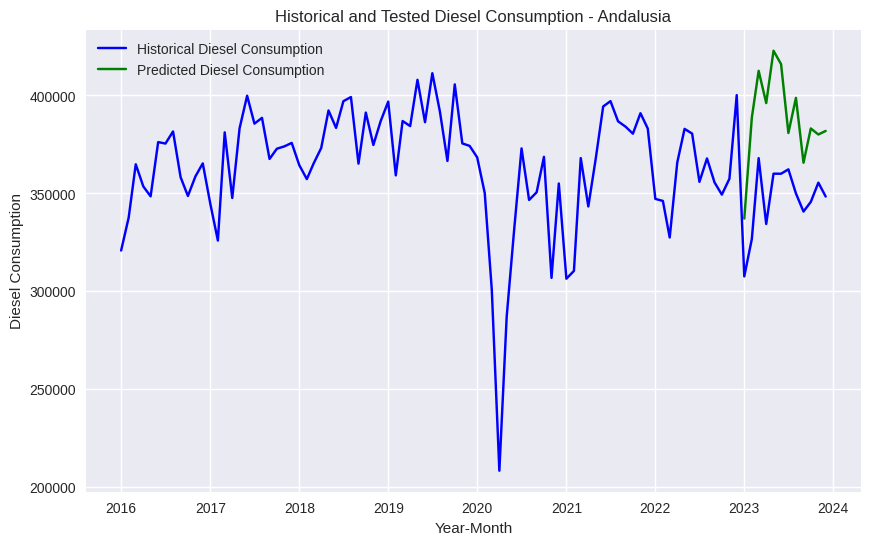

In [212]:
import matplotlib.pyplot as plt

# Filter the dataframe to include data from 2016 onwards
df_filtered = df_Andalusia[df_Andalusia['year_month'] >= '2016-01']

# Separate historical and predicted data
historical_data = df_filtered.copy()
predicted_data = df_filtered[df_filtered['year_month'] >= '2023-01']

# Plot historical and predicted values
plt.figure(figsize=(10, 6))
plt.plot(historical_data['year_month'], historical_data['diesel_consumption'], label='Historical Diesel Consumption', color='blue')
plt.plot(predicted_data['year_month'], predicted_data['predictions'], label='Predicted Diesel Consumption', color='green')
plt.xlabel('Year-Month')
plt.ylabel('Diesel Consumption')
plt.title('Historical and Tested Diesel Consumption - Andalusia')
plt.legend()
plt.show()


In [213]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAPE
mape = np.mean(np.abs((test['diesel_consumption'] - predictions) / test['diesel_consumption'])) * 100

# Calculate MAE and RMSE
mae = mean_absolute_error(test['diesel_consumption'], predictions)
rmse = np.sqrt(mean_squared_error(test['diesel_consumption'], predictions))

# Print accuracy metrics
print('MAPE:', mape)
print('MAE:', mae)
print('RMSE:', rmse)

MAPE: 12.882585781436365
MAE: 43823.12267442345
RMSE: 47102.09607412822


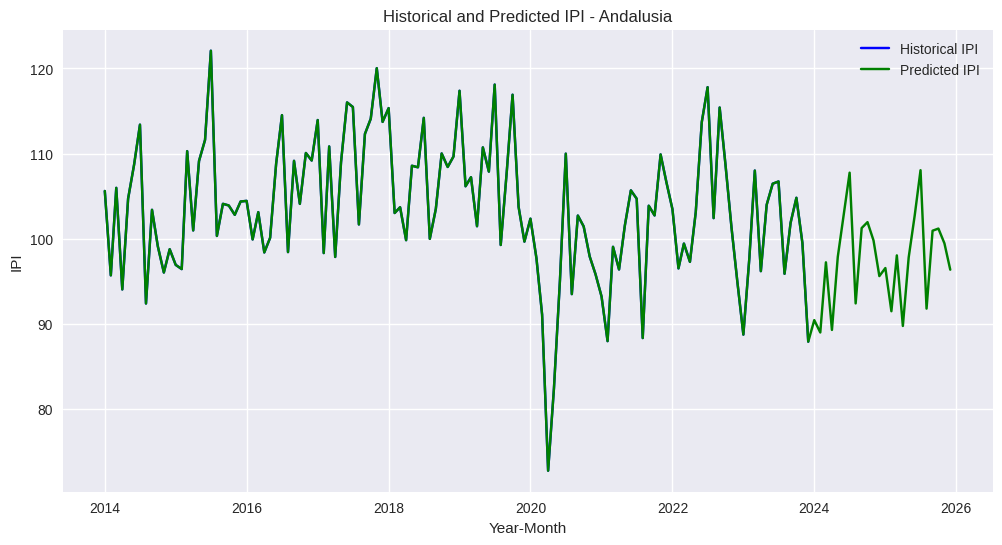

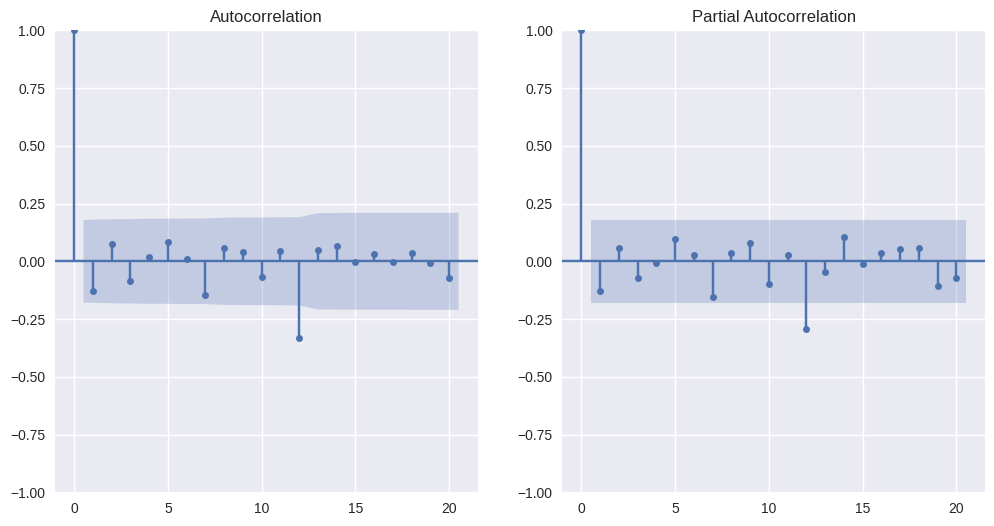

Ljung-Box Test Statistic (IPI Residuals): [8.42980109]
p-values (IPI Residuals): [0.58693105]
if p-value > 0.05 --> Data is uncorrelated (and is WN)


In [214]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ensure there are no infinite values
df_Andalusia['ipi'].replace([np.inf, -np.inf], 0, inplace=True)

# Define the SARIMAX model for IPI
model_ipi = sm.tsa.statespace.SARIMAX(df_Andalusia['ipi'],
                                      order=(1, 1, 1),
                                      seasonal_order=(1, 1, 1, 12))

# Fit the model
sarimax_model_ipi = model_ipi.fit()

# Create a DataFrame to hold future dates (monthly for 2024 and 2025)
future_dates_ipi = pd.date_range(start='2024-01-01', end='2025-12-01', freq='MS')
future_df_ipi = pd.DataFrame({'year_month': future_dates_ipi})

# Make predictions for the future period (2024 and 2025) for IPI
future_predictions_ipi = sarimax_model_ipi.get_forecast(steps=len(future_df_ipi)).predicted_mean

# Combine historical and future data for IPI
combined_df_ipi = pd.concat([df_Andalusia[['year_month', 'ipi']], future_df_ipi], ignore_index=True)
combined_df_ipi['predicted_ipi'] = pd.concat([df_Andalusia['ipi'], future_predictions_ipi], ignore_index=True)

# Plot IPI predictions
plt.figure(figsize=(12, 6))
plt.plot(combined_df_ipi['year_month'], combined_df_ipi['ipi'], label='Historical IPI', color='blue')
plt.plot(combined_df_ipi['year_month'], combined_df_ipi['predicted_ipi'], label='Predicted IPI', color='green')
plt.xlabel('Year-Month')
plt.ylabel('IPI')
plt.title('Historical and Predicted IPI - Andalusia')
plt.legend()
plt.show()

# Plot ACF and PACF of IPI residuals
residuals_ipi = sarimax_model_ipi.resid

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals_ipi, lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(residuals_ipi, lags=20, ax=plt.gca())
plt.show()

# Perform the Ljung-Box test on IPI residuals
ljung_box_result_resid_ipi = acorr_ljungbox(residuals_ipi, lags=[10])

# Print the test results for IPI residuals
print('Ljung-Box Test Statistic (IPI Residuals):', ljung_box_result_resid_ipi['lb_stat'].values)
print('p-values (IPI Residuals):', ljung_box_result_resid_ipi['lb_pvalue'].values)
print('if p-value > 0.05 --> Data is uncorrelated (and is WN)')


In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming df_global already contains the entire dataset including 2023
# Fill missing values and handle infinite values
df_Andalusia['covid_period'].fillna(0, inplace=True)
df_Andalusia['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)

# Define the SARIMAX model using the entire dataset
model = sm.tsa.statespace.SARIMAX(df_Andalusia['diesel_consumption'],
                                  order=(1, 1, 0),
                                  seasonal_order=(1, 1, 0, 12),
                                  exog=df_Andalusia[['covid_period', 'ipi']])

# Fit the model
sarimax_model = model.fit()

# Create a DataFrame to hold future dates (monthly for 2024 and 2025)
future_dates = pd.date_range(start='2024-01-01', end='2025-12-01', freq='MS')
future_df = pd.DataFrame({'year_month': future_dates})

# Create a placeholder for the 'covid_period' column in the future data (assuming no covid period for simplicity)
future_df['covid_period'] = 0

# Fill in the 'ipi' column for future dates based on historical data or assumptions
# Here, we use the last available 'ipi' value from the historical data as a simple assumption
last_ipi_value = df_Andalusia['ipi'].iloc[-1]
future_df['ipi'] = last_ipi_value

# Make predictions for the future period (2024 and 2025)
future_exog = future_df[['covid_period', 'ipi']]
future_predictions = sarimax_model.get_forecast(steps=len(future_df), exog=future_exog).predicted_mean

# Combine historical and future data for plotting
combined_df = pd.concat([df_Andalusia, future_df], ignore_index=True)

# Set the predictions in the combined DataFrame
combined_df['predictions'] = pd.concat([df_Andalusia['diesel_consumption'], future_predictions], ignore_index=True)

In [216]:
# Add the predictions to the 'gasoline_consumption_diff' and 'historical_and_predicted' columns
df_Andalusia = combined_df.copy()  # To ensure df_global is updated with new data

# For gasoline_consumption_diff, we'll use the same prediction values for simplicity
df_Andalusia['gasoline_consumption_diff'] = df_Andalusia['predictions']

# For historical_and_predicted, we'll also use the same prediction values
df_Andalusia['historical_and_predicted'] = df_Andalusia['predictions']


In [217]:
df_Andalusia

,year_month,diesel_consumption,lastbrentprice,apparent_temperature_max,days_holidays,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel,diesel_consumption_ma,gdp_xcapita_ma,diesel_consumption_diff,predictions,gasoline_consumption_diff,historical_and_predicted
0,2014-01-01,324160.87,106.40,13.67,2.0,34.94,0.1,1.144824e+07,8381267.0,1365.932260,0.0,0.0,0.5,-0.5,-0.5,105.607,0.0,104.0,3998.0,7107.0,NaN,NaN,NaN,324160.870000,324160.870000,324160.870000
1,2014-02-01,298274.45,109.07,13.45,1.0,34.94,-0.2,1.175540e+07,8381253.0,1402.582914,0.0,0.0,0.2,0.0,0.2,95.693,0.0,102.0,3998.0,7107.0,NaN,NaN,-25886.42,298274.450000,298274.450000,298274.450000
2,2014-03-01,347401.10,107.76,18.27,NaN,34.94,-0.1,1.079752e+07,8381239.0,1288.296817,0.0,0.0,0.5,0.0,0.3,105.974,0.0,224.0,3998.0,7107.0,NaN,NaN,49126.65,347401.100000,347401.100000,347401.100000
3,2014-04-01,328745.20,108.07,24.56,2.0,34.74,0.3,1.141329e+07,8381274.0,1361.761038,0.0,0.0,0.0,0.4,0.9,94.041,1.0,80.0,3998.0,7107.0,NaN,NaN,-18655.90,328745.200000,328745.200000,328745.200000
4,2014-05-01,347275.01,109.41,28.14,1.0,34.74,0.1,1.147628e+07,8381309.0,1369.270114,0.0,0.0,0.0,0.1,0.0,104.709,1.0,133.0,3998.0,7107.0,NaN,NaN,18529.81,347275.010000,347275.010000,347275.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2025-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,87.902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317680.626078,317680.626078,317680.626078
140,2025-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,87.902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284558.489413,284558.489413,284558.489413
141,2025-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,87.902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285079.957527,285079.957527,285079.957527
142,2025-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,87.902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311957.925067,311957.925067,311957.925067


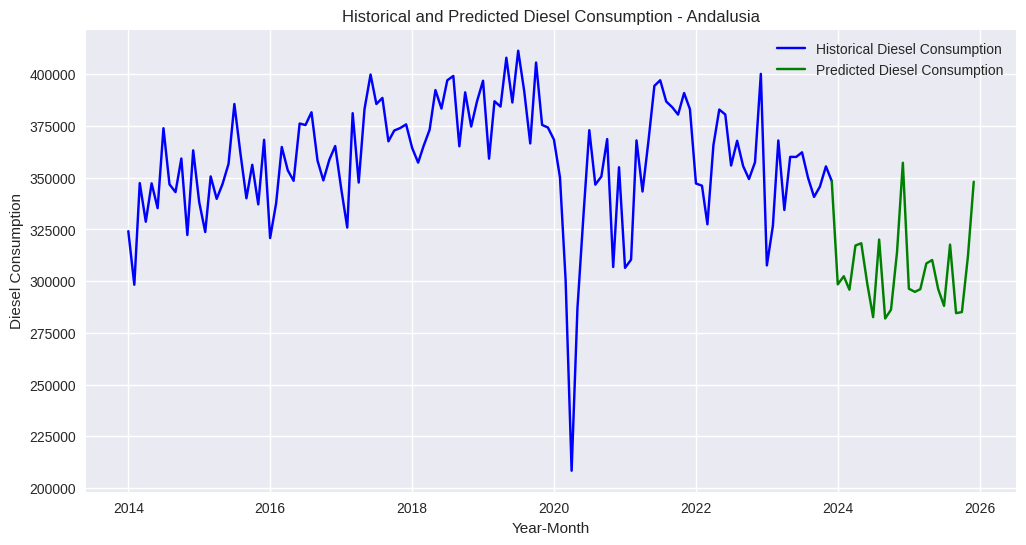

In [218]:
# Filter the dataframe to include data before and after 2023
historical_data = combined_df[combined_df['year_month'] < '2024-02-01']
predicted_data = combined_df[combined_df['year_month'] >= '2023-12-01']

# Plot historical and predicted values
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(historical_data['year_month'], historical_data['diesel_consumption'], label='Historical Diesel Consumption', color='blue')

# Plot predicted data
plt.plot(predicted_data['year_month'], predicted_data['predictions'], label='Predicted Diesel Consumption', color='green')

plt.xlabel('Year-Month')
plt.ylabel('Diesel Consumption')
plt.title('Historical and Predicted Diesel Consumption - Andalusia')
plt.legend()
plt.show()


# **Catalonia**

In [219]:
import pandas as pd

# Assuming df is your original DataFrame
df_Catalonia = df[df['region'] == 'Catalonia']

# Display the first few rows to confirm
print(df_Catalonia.head())

   year_month     region  total_consumption  diesel_consumption  diesel_price  \
16 2014-01-01  Catalonia          390505.34           333824.18           NaN   
32 2014-02-01  Catalonia          371057.79           315883.16           NaN   
43 2014-03-01  Catalonia          395673.79           333529.72           NaN   
57 2014-04-01  Catalonia          372492.90           309880.41           NaN   
79 2014-05-01  Catalonia          380072.39           315583.71           NaN   

    diesel_withouttaxes lastbrentprice  apparent_temperature_max  \
16                  NaN         106,40                     12.43   
32                  NaN         109,07                     11.89   
43                  NaN         107,76                     15.14   
57                  NaN         108,07                     19.70   
79                  NaN         109,41                     21.05   

    days_holidays  UnemRate  IPC           gdp  population  gdp_xcapita  \
16            2.0     22.10  

In [220]:
# Drop the specified columns
df_Catalonia = df_Catalonia.drop(columns=['total_consumption', 'diesel_withouttaxes', 'touristic_region', 'region'])

In [221]:
import pandas as pd
from IPython.display import display, HTML
import base64
from io import BytesIO

def download_excel(df):
    # Create a BytesIO buffer to save the Excel file
    output = BytesIO()
    # Using the default Excel writer
    df.to_excel(output, index=False)
    output.seek(0)

    # Encode the Excel file to base64
    data = base64.b64encode(output.read()).decode('utf-8')

    # Generate a download link
    html = '<a download="df_filled.xlsx" href="data:application/vnd.openxmlformats-officedocument.spreadsheetml.sheet;base64,{0}" target="_blank">Download Excel file</a>'.format(data)
    display(HTML(html))

# Assume df is your DataFrame
download_excel(df_Catalonia)

In [222]:
# Assuming df_global is your original DataFrame

# Create a sub-data frame 'df_surface' with only the 'year_month' and 'surface_surface_area_to_build' columns
df_surface = df_Catalonia[['year_month', 'surface_surface_area_to_build']]

# Display the sub-data frame
df_surface

,year_month,surface_surface_area_to_build
16,2014-01-01,29.0
32,2014-02-01,129.0
43,2014-03-01,222.0
57,2014-04-01,583.0
79,2014-05-01,131.0
...,...,...
2004,2023-10-01,NaN
2017,2023-11-01,NaN
2039,2023-12-01,NaN
2053,2024-01-01,NaN


In [223]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Assuming df_surface is your DataFrame
# Convert 'year_month' to datetime
df_surface['year_month'] = pd.to_datetime(df_surface['year_month'])

# Exclude rows with dates in the year 2023
df_surface_filtered = df_surface[df_surface['year_month'].dt.year != 2023]

# Fit SARIMA model
order = (2, 0, 0)  # (p,d,q)
seasonal_order = (2, 1, 0, 6)  # (P,D,Q,s)
model = SARIMAX(df_surface_filtered['surface_surface_area_to_build'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Show statistical summary
print(results.summary())

# Ljung-Box test for white noise
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test results:")
print(ljung_box_result)

# Forecasting for 2023
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start='2023-01-01', periods=forecast_steps, freq='MS')
forecast_df = forecast.predicted_mean
forecast_df.index = forecast_index

# Combine the historical data and forecast
df_forecast = pd.DataFrame({
    'year_month': forecast_df.index,
    'predictions': forecast_df.values
})

# Merge the forecast with the original DataFrame
df_combined = pd.merge(df_surface, df_forecast, on='year_month', how='outer')

# Fill NaN values in 'surface_surface_area_to_build' column with 0
df_combined['surface_surface_area_to_build'].fillna(0, inplace=True)

# Display the combined DataFrame
print(df_combined)

# Combine the historical data and forecast
df_forecast = pd.DataFrame({
    'year_month': forecast_df.index,
    'predictions': forecast_df.values
})

# Merge the forecast with the original DataFrame
df_combined = pd.merge(df_surface, df_forecast, on='year_month', how='outer')

# Fill NaN values in 'surface_surface_area_to_build' column with 0
df_combined['surface_surface_area_to_build'].fillna(0, inplace=True)

# Create the 'surface_area' column
df_combined['surface_area'] = df_combined.apply(
    lambda row: row['surface_surface_area_to_build'] if row['year_month'].year != 2023 else row['predictions'],
    axis=1
)


                                     SARIMAX Results                                     
Dep. Variable:     surface_surface_area_to_build   No. Observations:                  110
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 6)   Log Likelihood                -691.613
Date:                           Wed, 10 Jul 2024   AIC                           1393.225
Time:                                   11:54:55   BIC                           1406.447
Sample:                                        0   HQIC                          1398.582
                                           - 110                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0196      0.157      0.125      0.901      -0.289       0.328
ar.L2          0.1891      0.092      2.061

In [224]:
# Drop the unnecessary columns
df_combined.drop(columns=['surface_surface_area_to_build', 'predictions'], inplace=True)

# Display the combined DataFrame
print(df_combined)


    year_month  surface_area
0   2014-01-01     29.000000
1   2014-02-01    129.000000
2   2014-03-01    222.000000
3   2014-04-01    583.000000
4   2014-05-01    131.000000
..         ...           ...
117 2023-10-01    222.830763
118 2023-11-01    229.427234
119 2023-12-01    243.664061
120 2024-01-01      0.000000
121 2024-02-01      0.000000

[122 rows x 2 columns]


In [225]:
# Merge df_global with df_combined on 'year_month'
df_Catalonia = pd.merge(df_Catalonia, df_combined[['year_month', 'surface_area']], on='year_month', how='left')

# Replace 'surface_surface_area_to_build' in df_global with 'surface_area' from df_combined
df_Catalonia['surface_surface_area_to_build'] = df_Catalonia['surface_area']

# Drop the 'surface_area' column as it is no longer needed
df_Catalonia.drop(columns=['surface_area'], inplace=True)

# Display the updated DataFrame
print(df_Catalonia)

    year_month  diesel_consumption  diesel_price lastbrentprice  \
0   2014-01-01           333824.18           NaN         106,40   
1   2014-02-01           315883.16           NaN         109,07   
2   2014-03-01           333529.72           NaN         107,76   
3   2014-04-01           309880.41           NaN         108,07   
4   2014-05-01           315583.71           NaN         109,41   
..         ...                 ...           ...            ...   
117 2023-10-01           347109.18       129.183          85,02   
118 2023-11-01           380304.82       123.639          80,86   
119 2023-12-01           344343.47       118.129          77,04   
120 2024-01-01           358644.01       117.262          80,55   
121 2024-02-01           322507.88       121.817          81,91   

     apparent_temperature_max  days_holidays  UnemRate  IPC           gdp  \
0                       12.43            2.0     22.10  0.3  1.623530e+07   
1                       11.89            

In [226]:
import pandas as pd
import numpy as np

# Assuming df_global is your DataFrame
# Convert 'year_month' to datetime if it isn't already
df_Catalonia['year_month'] = pd.to_datetime(df_Catalonia['year_month'])

# Filter for rows in the year 2024
mask_2024 = df_Catalonia['year_month'].dt.year == 2024

# Replace 0s with NaNs in the specified rows
df_Catalonia.loc[mask_2024] = df_Catalonia.loc[mask_2024].replace(0, np.nan)

# Display the updated DataFrame
df_Catalonia

,year_month,diesel_consumption,diesel_price,lastbrentprice,apparent_temperature_max,days_holidays,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel
0,2014-01-01,333824.18,NaN,"106,40",12.43,2.0,22.10,0.3,1.623530e+07,7440655.0,2181.972291,0.0,0.0,0.7,-0.4,-0.3,91.870,0.0,29.000000,5817.0,10341.0
1,2014-02-01,315883.16,NaN,"109,07",11.89,NaN,22.10,0.2,1.667090e+07,7436744.0,2241.693457,0.0,0.0,0.3,-0.1,0.3,92.986,0.0,129.000000,5817.0,10341.0
2,2014-03-01,333529.72,NaN,"107,76",15.14,NaN,22.10,0.1,1.531249e+07,7432833.0,2060.114434,0.0,0.0,0.1,-0.1,0.6,99.257,0.0,222.000000,5817.0,10341.0
3,2014-04-01,309880.41,NaN,"108,07",19.70,2.0,20.22,0.7,1.618574e+07,7430628.0,2178.246297,0.0,0.0,0.1,0.5,0.9,93.136,1.0,583.000000,5817.0,10341.0
4,2014-05-01,315583.71,NaN,"109,41",21.05,1.0,20.22,0.5,1.627506e+07,7428423.0,2190.916958,0.0,0.0,0.1,0.1,0.1,99.796,1.0,131.000000,5817.0,10341.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2023-10-01,347109.18,129.183,"85,02",24.43,1.0,9.16,3.4,2.152136e+07,7901963.0,2723.546419,0.0,1.0,-0.7,-0.9,-0.2,105.152,1.0,222.830763,11679.0,5031.0
118,2023-11-01,380304.82,123.639,"80,86",17.49,1.0,9.16,3.1,2.158064e+07,7901963.0,2731.048147,0.0,1.0,-1.3,-1.6,-0.8,107.559,0.0,229.427234,11679.0,5031.0
119,2023-12-01,344343.47,118.129,"77,04",14.28,4.0,9.16,3.2,2.409443e+07,7901963.0,3049.170529,0.0,1.0,0.4,-0.9,0.1,86.848,0.0,243.664061,11679.0,5031.0
120,2024-01-01,358644.01,117.262,"80,55",13.86,NaN,9.48,3.3,1.644517e+07,7901963.0,2081.149845,NaN,1.0,3.1,0.1,0.1,104.478,NaN,NaN,NaN,NaN


In [227]:
# Replace commas with dots in all columns to convert to numeric values
for col in df_Catalonia.columns:
    if df_Catalonia[col].dtype == object:
        df_Catalonia[col] = df_Catalonia[col].str.replace(',', '.').astype(float)

# Convert all other columns to float64 except 'year_month'
for col in df_Catalonia.columns:
    if col != 'year_month':
        df_Catalonia[col] = df_Catalonia[col].astype('float64')

# Drop the 'gasoline_price' column
df_Catalonia.drop(columns=['diesel_price'], inplace=True)

# Display the dataframe info to confirm changes
df_Catalonia.info()

# Calculate 12-month moving average for 'gasoline_consumption' and 'gdp_xcapita'
df_Catalonia['diesel_consumption_ma'] = df_Catalonia['diesel_consumption'].rolling(window=12).mean()
df_Catalonia['gdp_xcapita_ma'] = df_Catalonia['gdp_xcapita'].rolling(window=12).mean()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   year_month                                122 non-null    datetime64[ns]
 1   diesel_consumption                        122 non-null    float64       
 2   lastbrentprice                            122 non-null    float64       
 3   apparent_temperature_max                  122 non-null    float64       
 4   days_holidays                             84 non-null     float64       
 5   UnemRate                                  122 non-null    float64       
 6   IPC                                       122 non-null    float64       
 7   gdp                                       122 non-null    float64       
 8   population                                122 non-null    float64       
 9   gdp_xcapita                     

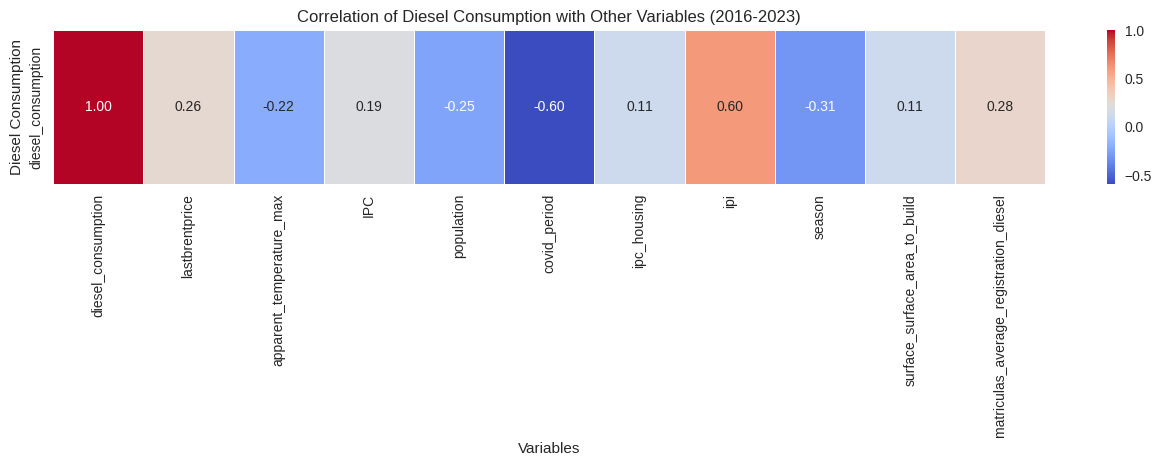

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for the specified period
df_filtered = df_Catalonia[(df_Catalonia['year_month'] >= '2016-01-01') & (df_Catalonia['year_month'] <= '2023-12-31')]

# Columns to exclude
columns_to_exclude = ['matriculas_average_registration_gasoline', 'diesel_consumption_ma', 'year_month']

# Drop the specified columns
df_filtered_excld = df_filtered.drop(columns=columns_to_exclude)

# Calculate the correlation matrix
correlation_matrix = df_filtered_excld.corr()

# Filter the correlation matrix to only show values greater than 0.1 or less than -0.1
filtered_corr_matrix = correlation_matrix.loc[['diesel_consumption']].T
filtered_corr_matrix = filtered_corr_matrix[(filtered_corr_matrix['diesel_consumption'] > 0.1) | (filtered_corr_matrix['diesel_consumption'] < -0.1)]

# Generate a heatmap
plt.figure(figsize=(16, 2))
sns.heatmap(filtered_corr_matrix.T, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Diesel Consumption with Other Variables (2016-2023)')
plt.xlabel('Variables')
plt.ylabel('Diesel Consumption')
plt.show()

In [229]:
# Fill missing values in covid_period column with 0
df_Catalonia['covid_period'].fillna(0, inplace=True)

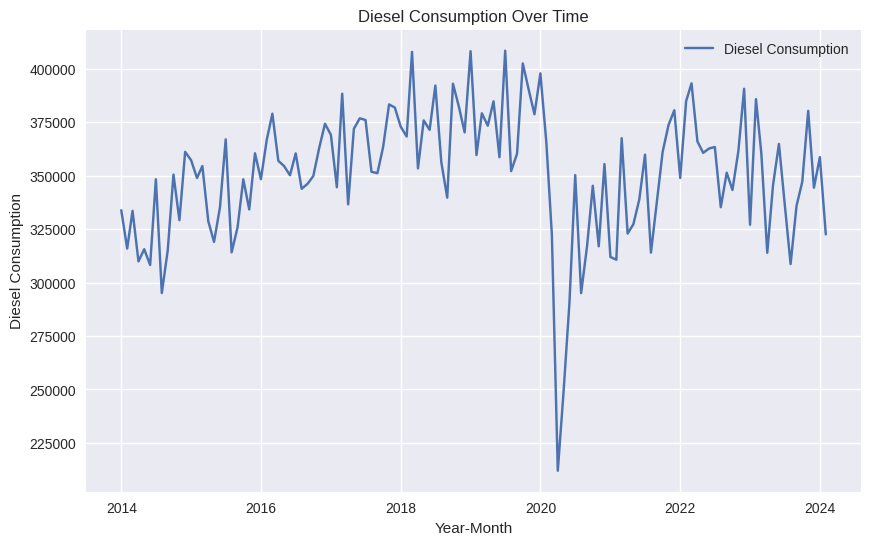

In [230]:
import matplotlib.pyplot as plt

# Plot the gasoline consumption
plt.figure(figsize=(10, 6))
plt.plot(df_Catalonia['year_month'], df_Catalonia['diesel_consumption'], label='Diesel Consumption')
plt.xlabel('Year-Month')
plt.ylabel('Diesel Consumption')
plt.title('Diesel Consumption Over Time')
plt.legend()
plt.show()

In [231]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(df_Catalonia['diesel_consumption'].dropna())

# Print the test results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('if p-value > 0.05 --> Data is not stationary')

ADF Statistic: -2.303946831321306
p-value: 0.17069819948833154
if p-value > 0.05 --> Data is not stationary


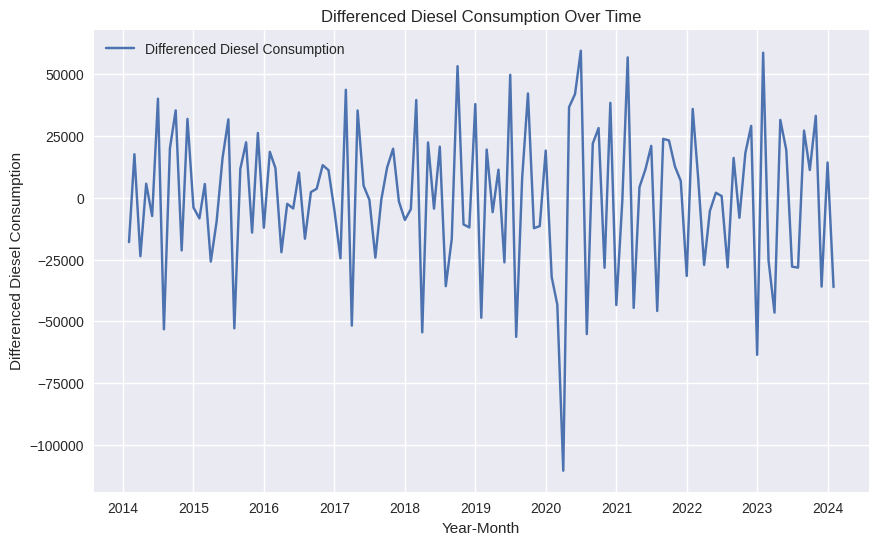

In [232]:
# Differencing the gasoline consumption
df_Catalonia['diesel_consumption_diff'] = df_Catalonia['diesel_consumption'].diff()

# Plot the differenced gasoline consumption
plt.figure(figsize=(10, 6))
plt.plot(df_Catalonia['year_month'], df_Catalonia['diesel_consumption_diff'], label='Differenced Diesel Consumption')
plt.xlabel('Year-Month')
plt.ylabel('Differenced Diesel Consumption')
plt.title('Differenced Diesel Consumption Over Time')
plt.legend()
plt.show()

In [233]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(df_Catalonia['diesel_consumption_diff'].dropna())

# Print the test results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

print('if p-value < 0.05 --> Data is stationary')

ADF Statistic: -3.589248387350367
p-value: 0.005969933673708488
if p-value < 0.05 --> Data is stationary


In [234]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
ljung_box_result = acorr_ljungbox(df_Catalonia['diesel_consumption'].dropna(), lags=[10])

# Print the test results
print('Ljung-Box Test Statistic:', ljung_box_result['lb_stat'].values)
print('p-values:', ljung_box_result['lb_pvalue'].values)
print('if p-value < 0.05 --> Data is correlated (and not WN)')

Ljung-Box Test Statistic: [86.76259046]
p-values: [2.34257257e-14]
if p-value < 0.05 --> Data is correlated (and not WN)


In [235]:
# Split the data
train = df_Catalonia[df_Catalonia['year_month'] < '2023-01-01']
test = df_Catalonia[df_Catalonia['year_month'] >= '2023-01-01']

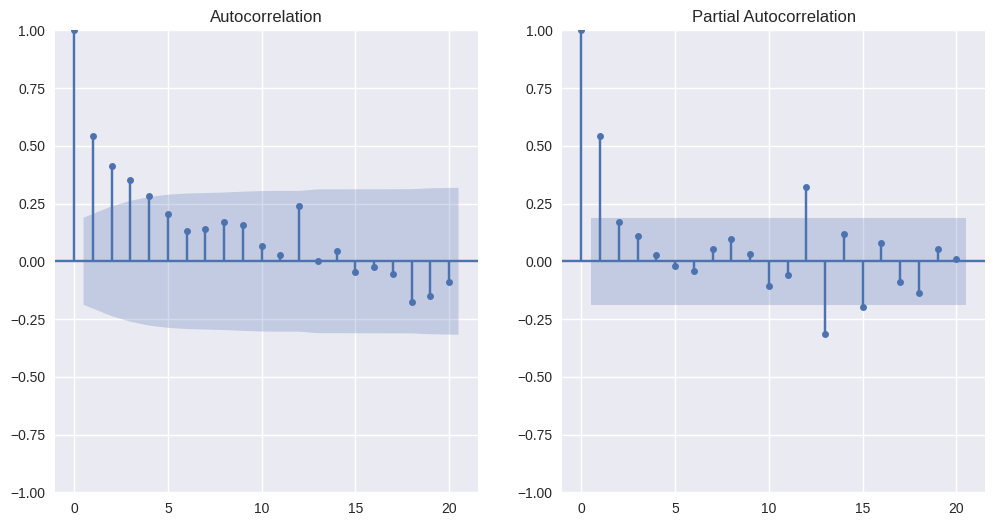

In [236]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(train['diesel_consumption'], lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(train['diesel_consumption'], lags=20, ax=plt.gca())
plt.show()

In [237]:
import statsmodels.api as sm

# Define the SARIMAX model with the new exogenous variable
model = sm.tsa.statespace.SARIMAX(train['diesel_consumption'],
                                  order=(1, 1, 2),
                                  seasonal_order=(1, 1, 0, 12),
                                  exog=train[['ipi']])

# Fit the model
sarimax_model = model.fit()

# Print the statistical summary
print(sarimax_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                  diesel_consumption   No. Observations:                  108
Model:             SARIMAX(1, 1, 2)x(1, 1, [], 12)   Log Likelihood               -1058.056
Date:                             Wed, 10 Jul 2024   AIC                           2128.113
Time:                                     11:54:59   BIC                           2143.436
Sample:                                          0   HQIC                          2134.304
                                             - 108                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ipi         3396.0972    245.657     13.825      0.000    2914.619    3877.576
ar.L1          0.8992      

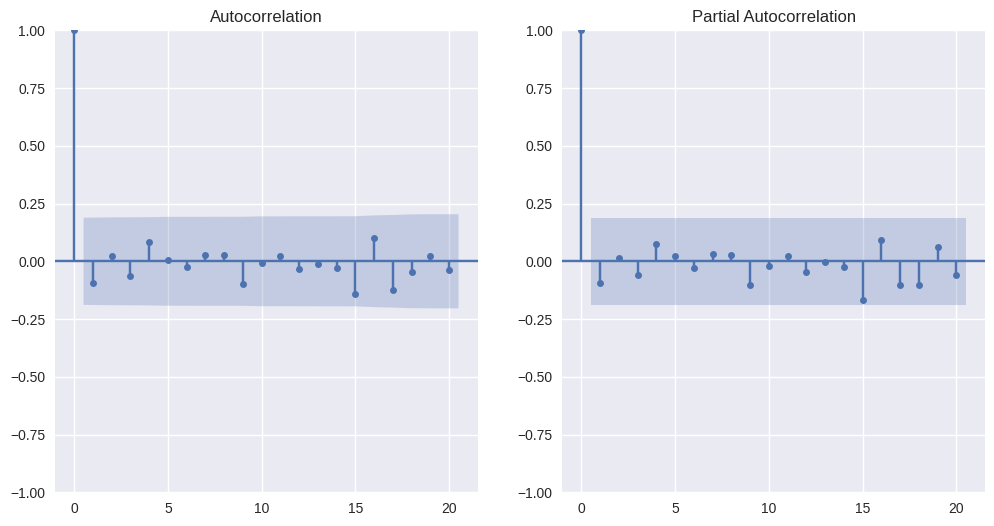

In [238]:
# Plot ACF and PACF of residuals
residuals = sarimax_model.resid

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.show()

In [239]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test on residuals
ljung_box_result_resid = acorr_ljungbox(residuals, lags=[10])

# Print the test results
print('Ljung-Box Test Statistic (Residuals):', ljung_box_result_resid['lb_stat'].values)
print('p-values (Residuals):', ljung_box_result_resid['lb_pvalue'].values)
print('if p-value > 0.05 --> Data is uncorrelated (and is WN)')

Ljung-Box Test Statistic (Residuals): [3.67476329]
p-values (Residuals): [0.96082868]
if p-value > 0.05 --> Data is uncorrelated (and is WN)


In [240]:
# Drop rows with dates beyond 2023
df_Catalonia = df_Catalonia[df_Catalonia['year_month'] < '2024-01-01']

In [241]:
# Ensure there are no infinite values
df_Catalonia['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)

# Verify if there are any remaining NaNs or infinite values
print(df_Catalonia[['covid_period']].isnull().sum())
print(np.isfinite(df_Catalonia[['covid_period']]).sum())

covid_period    0
dtype: int64
covid_period    120
dtype: int64


In [242]:
# Fill missing values with 0
train['covid_period'].fillna(0, inplace=True)
test['covid_period'].fillna(0, inplace=True)

# Replace infinite values with 0
train['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)
test['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)

# Verify that there are no more infinite or missing values
print('Missing values in train:', train[['covid_period']].isnull().sum())
print('Infinite values in train:', np.isfinite(train[['covid_period']]).sum())
print('Missing values in test:', test[['covid_period']].isnull().sum())
print('Infinite values in test:', np.isfinite(test[['covid_period']]).sum())

Missing values in train: covid_period    0
dtype: int64
Infinite values in train: covid_period    108
dtype: int64
Missing values in test: covid_period    0
dtype: int64
Infinite values in test: covid_period    14
dtype: int64


In [243]:
# Fill missing values with 0
train['covid_period'].fillna(0, inplace=True)
test['covid_period'].fillna(0, inplace=True)

# Replace infinite values with 0
train['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)
test['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)

# Verify that there are no more infinite or missing values
print('Missing values in train:', train[['covid_period']].isnull().sum())
print('Infinite values in train:', np.isfinite(train[['covid_period']]).sum())
print('Missing values in test:', test[['covid_period']].isnull().sum())
print('Infinite values in test:', np.isfinite(test[['covid_period']]).sum())

Missing values in train: covid_period    0
dtype: int64
Infinite values in train: covid_period    108
dtype: int64
Missing values in test: covid_period    0
dtype: int64
Infinite values in test: covid_period    14
dtype: int64


In [244]:
# Ensure the indices are properly aligned
test_exog = test[['ipi']]

# Make predictions for the test set
predictions = sarimax_model.predict(start=len(train), end=len(train) + len(test) - 1, exog=test_exog, dynamic=False)

# Add in-sample predictions to the DataFrame
train_exog = train[['ipi']]
in_sample_predictions = sarimax_model.predict(start=0, end=len(train) - 1, exog=train_exog, dynamic=False)

# Combine in-sample and out-of-sample predictions
full_predictions = pd.concat([in_sample_predictions, predictions])

# Ensure the length of predictions matches the length of df_global
df_Catalonia['predictions'] = full_predictions.reset_index(drop=True)
# Ensure that the length of the predictions for 2023 matches the number of rows in 2023
rows_2023 = df_Catalonia[df_Catalonia['year_month'] >= '2023-01-01'].index
if len(predictions) == len(rows_2023):
    df_Catalonia.loc[rows_2023, 'historical_and_predicted'] = predictions.values
else:
    print(f"Length mismatch: predictions length is {len(predictions)}, but 2023 rows count is {len(rows_2023)}")


Length mismatch: predictions length is 14, but 2023 rows count is 12


In [245]:
# Ensure that the length of the predictions for 2023 matches the number of rows in 2023
rows_2023 = df_Catalonia[df_Catalonia['year_month'] >= '2023-01-01'].index
if len(predictions) == len(rows_2023):
    df_Andalusia.loc[rows_2023, 'historical_and_predicted'] = predictions.values
else:
    print(f"Length mismatch: predictions length is {len(predictions)}, but 2023 rows count is {len(rows_2023)}")

Length mismatch: predictions length is 14, but 2023 rows count is 12


In [246]:
df_Catalonia

,year_month,diesel_consumption,lastbrentprice,apparent_temperature_max,days_holidays,UnemRate,IPC,gdp,population,gdp_xcapita,covid_period,ukraine_war_period,ipc_housing,ipc_transport,ipc_tourism,ipi,season,surface_surface_area_to_build,matriculas_average_registration_gasoline,matriculas_average_registration_diesel,diesel_consumption_ma,gdp_xcapita_ma,diesel_consumption_diff,predictions
0,2014-01-01,333824.18,106.40,12.43,2.0,22.10,0.3,1.623530e+07,7440655.0,2181.972291,0.0,0.0,0.7,-0.4,-0.3,91.870,0.0,29.000000,5817.0,10341.0,NaN,NaN,NaN,311999.448741
1,2014-02-01,315883.16,109.07,11.89,NaN,22.10,0.2,1.667090e+07,7436744.0,2241.693457,0.0,0.0,0.3,-0.1,0.3,92.986,0.0,129.000000,5817.0,10341.0,NaN,NaN,-17941.02,328655.293310
2,2014-03-01,333529.72,107.76,15.14,NaN,22.10,0.1,1.531249e+07,7432833.0,2060.114434,0.0,0.0,0.1,-0.1,0.6,99.257,0.0,222.000000,5817.0,10341.0,NaN,NaN,17646.56,343412.656334
3,2014-04-01,309880.41,108.07,19.70,2.0,20.22,0.7,1.618574e+07,7430628.0,2178.246297,0.0,0.0,0.1,0.5,0.9,93.136,1.0,583.000000,5817.0,10341.0,NaN,NaN,-23649.31,317914.734818
4,2014-05-01,315583.71,109.41,21.05,1.0,20.22,0.5,1.627506e+07,7428423.0,2190.916958,0.0,0.0,0.1,0.1,0.1,99.796,1.0,131.000000,5817.0,10341.0,NaN,NaN,5703.30,336879.345897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2023-08-01,308645.28,86.83,32.98,1.0,8.68,2.5,2.164732e+07,7901963.0,2739.486162,0.0,1.0,-0.4,3.0,0.2,78.203,1.0,233.031880,11679.0,5031.0,349140.291667,2909.754323,-28274.90,337105.884523
116,2023-09-01,335849.43,95.31,28.59,1.0,8.68,3.4,2.472851e+07,7901963.0,3129.413597,0.0,1.0,0.2,0.9,-0.2,100.111,1.0,296.087968,11679.0,5031.0,347846.949167,2938.149021,27204.15,345144.504248
117,2023-10-01,347109.18,85.02,24.43,1.0,9.16,3.4,2.152136e+07,7901963.0,2723.546419,0.0,1.0,-0.7,-0.9,-0.2,105.152,1.0,222.830763,11679.0,5031.0,348165.189167,2920.018124,11259.75,376029.660121
118,2023-11-01,380304.82,80.86,17.49,1.0,9.16,3.1,2.158064e+07,7901963.0,2731.048147,0.0,1.0,-1.3,-1.6,-0.8,107.559,0.0,229.427234,11679.0,5031.0,349731.820000,2908.576429,33195.64,376373.449923


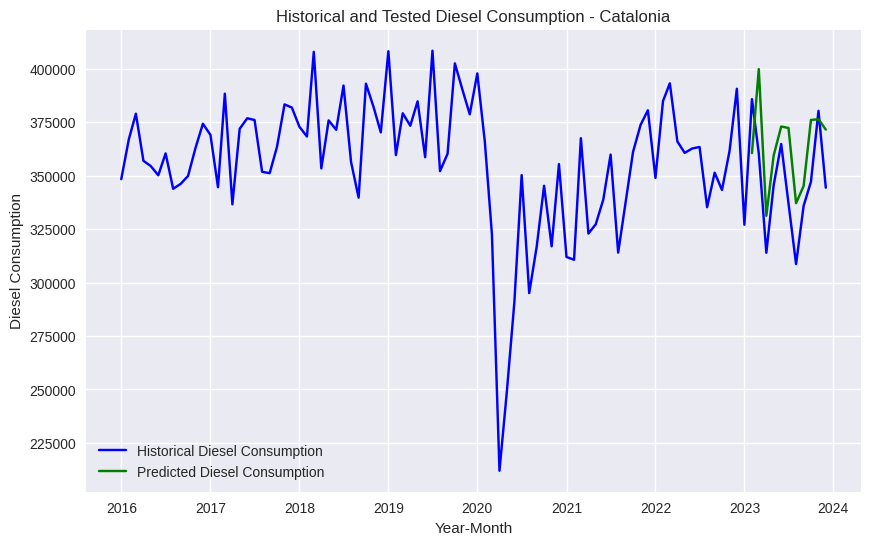

In [247]:
import matplotlib.pyplot as plt

# Filter the dataframe to include data from 2016 onwards
df_filtered = df_Catalonia[df_Catalonia['year_month'] >= '2016-01']

# Separate historical and predicted data
historical_data = df_filtered.copy()
predicted_data = df_filtered[df_filtered['year_month'] > '2023-01']

# Plot historical and predicted values
plt.figure(figsize=(10, 6))
plt.plot(historical_data['year_month'], historical_data['diesel_consumption'], label='Historical Diesel Consumption', color='blue')
plt.plot(predicted_data['year_month'], predicted_data['predictions'], label='Predicted Diesel Consumption', color='green')
plt.xlabel('Year-Month')
plt.ylabel('Diesel Consumption')
plt.title('Historical and Tested Diesel Consumption - Catalonia')
plt.legend()
plt.show()

In [248]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAPE
mape = np.mean(np.abs((test['diesel_consumption'] - predictions) / test['diesel_consumption'])) * 100

# Calculate MAE and RMSE
mae = mean_absolute_error(test['diesel_consumption'], predictions)
rmse = np.sqrt(mean_squared_error(test['diesel_consumption'], predictions))

# Print accuracy metrics
print('MAPE:', mape)
print('MAE:', mae)
print('RMSE:', rmse)

MAPE: 8.111652566152697
MAE: 27476.124601388146
RMSE: 33505.466055175246


                                     SARIMAX Results                                      
Dep. Variable:                                ipi   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -342.327
Date:                            Wed, 10 Jul 2024   AIC                            694.654
Time:                                    11:55:03   BIC                            708.018
Sample:                                         0   HQIC                           700.071
                                            - 120                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2636      0.132      2.002      0.045       0.006       0.522
ma.L1         -0.8158      0.094   

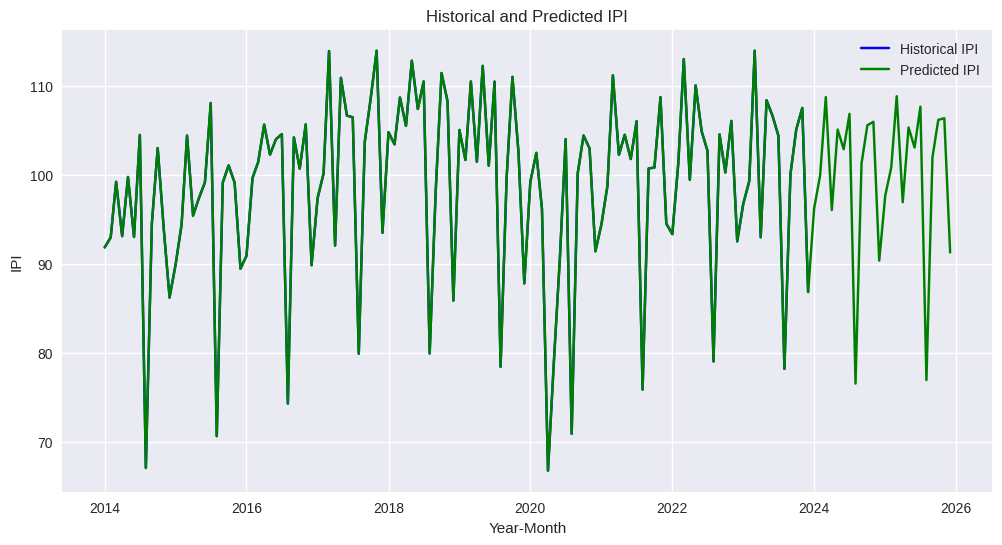

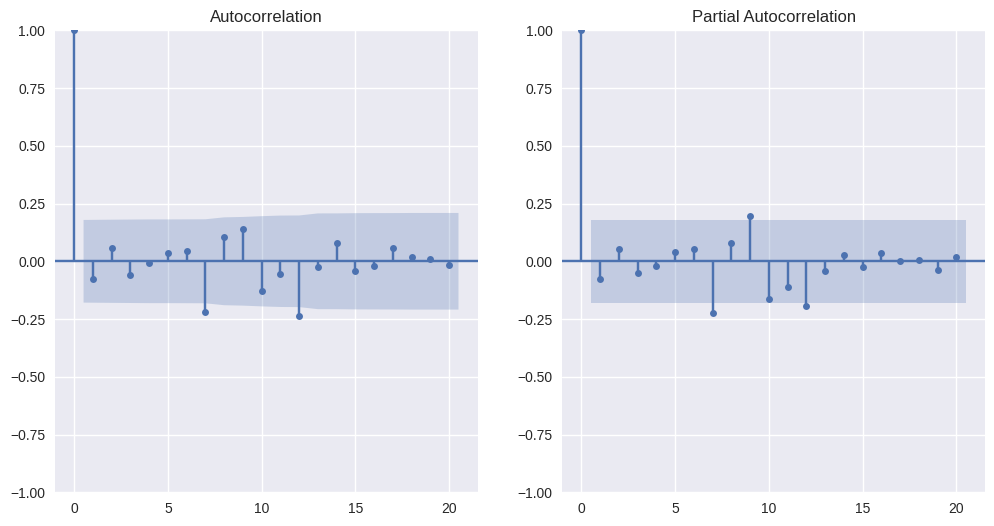

Ljung-Box Test Statistic (IPI Residuals): [14.49229327]
p-values (IPI Residuals): [0.15169722]
if p-value > 0.05 --> Data is uncorrelated (and is WN)
                                      SARIMAX Results                                       
Dep. Variable:                   diesel_consumption   No. Observations:                  120
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -1187.690
Date:                              Wed, 10 Jul 2024   AIC                           2391.379
Time:                                      11:55:06   BIC                           2412.762
Sample:                                           0   HQIC                          2400.048
                                              - 120                                         
Covariance Type:                                opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------

In [249]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ensure there are no infinite values
df_Catalonia['ipi'].replace([np.inf, -np.inf], 0, inplace=True)
df_Catalonia['covid_period'].replace([np.inf, -np.inf], 0, inplace=True)

# Check and handle NaN values
df_Catalonia['ipi'].fillna(method='ffill', inplace=True)
df_Catalonia['covid_period'].fillna(0, inplace=True)

# Define the SARIMAX model for IPI
model_ipi = sm.tsa.statespace.SARIMAX(df_Catalonia['ipi'],
                                      order=(1, 1, 1),
                                      seasonal_order=(1, 1, 1, 12))

# Fit the IPI model
sarimax_model_ipi = model_ipi.fit()

# Print the statistical summary for IPI model
print(sarimax_model_ipi.summary())

# Create a DataFrame to hold future dates (monthly for 2024 and 2025)
future_dates_ipi = pd.date_range(start='2024-01-01', end='2025-12-01', freq='MS')
future_df_ipi = pd.DataFrame({'year_month': future_dates_ipi})

# Make predictions for the future period (2024 and 2025) for IPI
future_predictions_ipi = sarimax_model_ipi.get_forecast(steps=len(future_df_ipi)).predicted_mean

# Combine historical and future data for IPI
combined_df_ipi = pd.concat([df_Catalonia[['year_month', 'ipi']], future_df_ipi], ignore_index=True)
combined_df_ipi['predicted_ipi'] = pd.concat([df_Catalonia['ipi'], future_predictions_ipi], ignore_index=True)

# Plot IPI predictions
plt.figure(figsize=(12, 6))
plt.plot(combined_df_ipi['year_month'], combined_df_ipi['ipi'], label='Historical IPI', color='blue')
plt.plot(combined_df_ipi['year_month'], combined_df_ipi['predicted_ipi'], label='Predicted IPI', color='green')
plt.xlabel('Year-Month')
plt.ylabel('IPI')
plt.title('Historical and Predicted IPI')
plt.legend()
plt.show()

# Plot ACF and PACF of IPI residuals
residuals_ipi = sarimax_model_ipi.resid

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals_ipi, lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(residuals_ipi, lags=20, ax=plt.gca())
plt.show()

# Perform the Ljung-Box test on IPI residuals
ljung_box_result_resid_ipi = acorr_ljungbox(residuals_ipi, lags=[10])

# Print the test results for IPI residuals
print('Ljung-Box Test Statistic (IPI Residuals):', ljung_box_result_resid_ipi['lb_stat'].values)
print('p-values (IPI Residuals):', ljung_box_result_resid_ipi['lb_pvalue'].values)
print('if p-value > 0.05 --> Data is uncorrelated (and is WN)')

# Use predicted IPI values for diesel consumption prediction
df_Catalonia['predicted_ipi'] = combined_df_ipi['predicted_ipi'].iloc[:len(df_Catalonia)].values
future_df = future_df_ipi.copy()
future_df['predicted_ipi'] = future_predictions_ipi.values
future_df['covid_period'] = 0  # Assuming no covid period in the future

# Define the SARIMAX model for diesel consumption using the predicted IPI values
model_diesel = sm.tsa.statespace.SARIMAX(df_Catalonia['diesel_consumption'],
                                         order=(1, 1, 2),
                                         seasonal_order=(1, 1, 1, 12),
                                         exog=df_Catalonia[['covid_period', 'predicted_ipi']])

# Fit the diesel consumption model
sarimax_model_diesel = model_diesel.fit()

# Print the statistical summary for diesel consumption model
print(sarimax_model_diesel.summary())

# Make predictions for the future period (2024 and 2025) for diesel consumption
future_exog = future_df[['covid_period', 'predicted_ipi']]
future_predictions_diesel = sarimax_model_diesel.get_forecast(steps=len(future_df), exog=future_exog).predicted_mean

# Combine historical and future data for plotting diesel consumption
combined_df_diesel = pd.concat([df_Catalonia, future_df], ignore_index=True)
combined_df_diesel['predictions'] = pd.concat([df_Catalonia['diesel_consumption'], future_predictions_diesel], ignore_index=True)

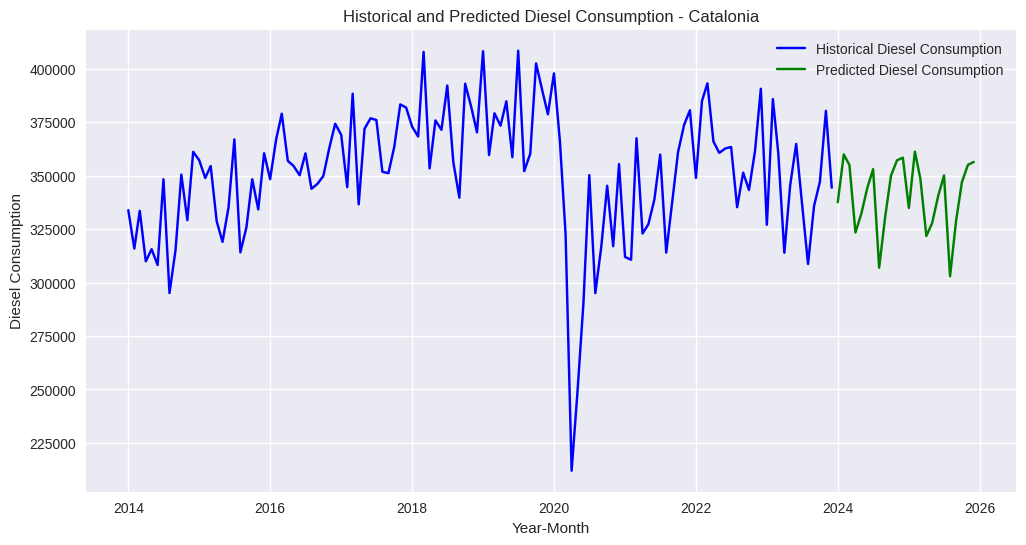

Ljung-Box Test Statistic (Diesel Residuals): [6.35823803]
p-values (Diesel Residuals): [0.78432147]
if p-value > 0.05 --> Data is uncorrelated (and is WN)


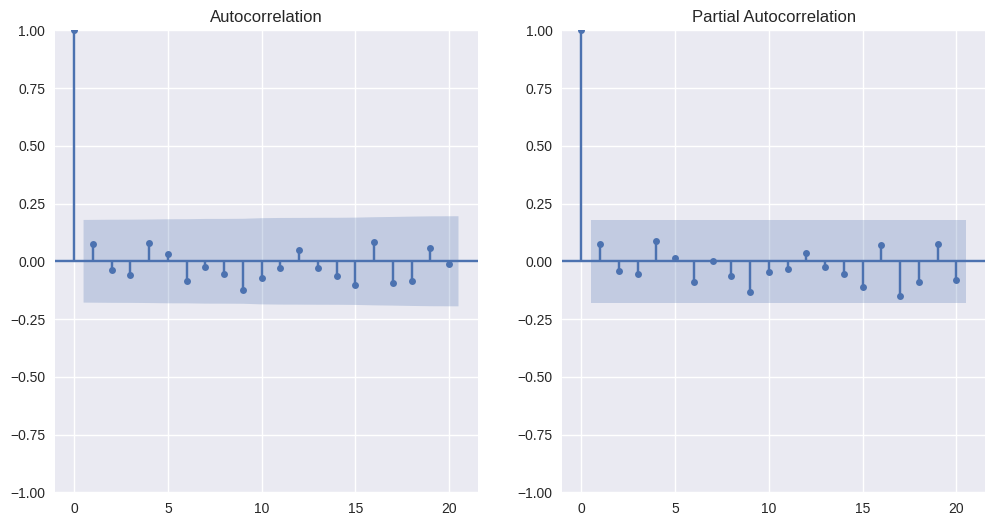

In [250]:
# Plot historical and predicted diesel consumption values
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(df_Catalonia['year_month'], df_Catalonia['diesel_consumption'], label='Historical Diesel Consumption', color='blue')

# Plot predicted data
plt.plot(future_dates_ipi, future_predictions_diesel, label='Predicted Diesel Consumption', color='green')

plt.xlabel('Year-Month')
plt.ylabel('Diesel Consumption')
plt.title('Historical and Predicted Diesel Consumption - Catalonia')
plt.legend()
plt.show()

# Perform the Ljung-Box test on diesel consumption residuals
residuals_diesel = sarimax_model_diesel.resid
ljung_box_result_resid_diesel = acorr_ljungbox(residuals_diesel, lags=[10])

# Print the test results for diesel consumption residuals
print('Ljung-Box Test Statistic (Diesel Residuals):', ljung_box_result_resid_diesel['lb_stat'].values)
print('p-values (Diesel Residuals):', ljung_box_result_resid_diesel['lb_pvalue'].values)
print('if p-value > 0.05 --> Data is uncorrelated (and is WN)')

# Plot ACF and PACF of diesel consumption residuals
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals_diesel, lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(residuals_diesel, lags=20, ax=plt.gca())
plt.show()
